# **Optimization of Apartment Selling Prices in Daegu: Application of Predictive Analysis and Machine Learning in the Real Estate Market**

**Created by: Akbar Rinaldi**

**Table of contents :**

1. Business Problem Understanding
2. Data Understanding
3. Exploratory Data Analysis
4. Data Preparation
5. Modeling
6. Conclusion and Recommendations
7. Deployment

****

![Cover](https://i.pinimg.com/originals/6e/51/7d/6e517d9e036b0c2b12a02b50dea2a146.jpg)

# **Business Problem Understanding**

**Context:**

Daegu, as one of the major cities in South Korea, has a dynamic and diverse real estate market. This market is influenced by various factors such as infrastructure developments, demographic changes, and economic trends. For example, prices per square meter for buying apartments in the city center and outside Daegu city center show significant differences, reflecting different demands depending on location. Additionally, the price-to-income ratio and price-to-rent ratio in Daegu show a broader picture of property accessibility and affordability in the city​​ ​[(Source)](https://www.numbeo.com/property-investment/in/Daegu#:~:text=Price%20per%20Square%20Feet%20to,1%2C858%2C045.34)

Urban development and infrastructure expansion in Daegu also play an important role in determining property values. Factors such as proximity to train stations, public facilities, and educational institutions are often the main considerations for property buyers and investors. This results in price fluctuations and different market trends in different parts of the city. Real estate agents in Daegu must be able to understand and respond to these dynamics to succeed in this highly competitive industry.

**Problem Statement:**

Real estate agents in Daegu face challenges in determining the right selling price, compounded by the considerable difference in rental and purchase prices between locations in the city center and outside the city center. Accuracy in setting prices is very important to maintain a balance between profits and market attractiveness. [(Source)](https://www.numbeo.com/property-investment/in/Daegu#:~:text=Apartment%20.2%2C500%2C000.00)

**Goals:**

The main goal is to develop a predictive model that can estimate the selling price of apartments in Daegu based on their characteristics. This model will help stakeholders make the right decisions about pricing, investment, and property development. The model will take into account features such as aisle type, distance to the nearest train station, nearby amenities, and property size.

**Analytical Approach:**

The approach involves analyzing datasets to identify patterns and relationships between apartment features and their sales prices. The regression model seems suitable for this task, given that the outcome variable (Sales Price) is continuous. This model will use apartment features as predictors to estimate the selling price.

**Evaluation Metrics:**


Model performance can be evaluated using metrics such as Root Mean Square Error (RMSE), Mean Absolute Error (MAE), and Mean Absolute Percentage Error (MAPE). These metrics provide insight into the accuracy and reliability of predictions, where lower values indicate a more accurate model. It is also important to consider the issues of overfitting and underfitting. Overfitting occurs when the model is too specific on the training data so that it is unable to predict new data well. On the other hand, underfitting occurs when the model cannot capture enough patterns from the training data, so it performs poorly on both the training and test data. These two conditions must be avoided to ensure a robust and reliable model.

| Metrics | Reasons for Use |
|--------|------------------------|
| RMSE (Root Mean Square Error) | - RMSE provides an assessment of the average model prediction error. <br> - RMSE is very sensitive to outliers because it squares the error. <br> - Suitable for scenarios where large errors in predictions must be avoided. |
| MAE (Mean Absolute Error) | - MAE measures the average absolute error between predictions and actual values. <br> - More robust against outliers than RMSE. <br> - Provides an easy-to-interpret assessment of the model's average performance. |
| MAPE (Mean Absolute Percentage Error) | - MAPE measures prediction error as a percentage of the true value. <br> - Makes it easy to interpret errors as a percentage, which is intuitive for business understanding. <br> - Allows comparison of accuracy between models or predictions at different scales. |

**Limitations:**

- The model will be specific to the Daegu real estate market and may not be common to other regions.
- The dataset is time-bound, meaning it represents a specific period and does not take into account market trends or future changes.
- Certain subjective factors that influence property prices, such as aesthetic appeal or neighborhood reputation, may not be reflected in the dataset.

Understanding these issues is important in guiding the development of effective predictive models, which will help real estate agents in Daegu deal with unique and complex market dynamics.

# **Data Understanding**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('data_daegu_apartment.csv')
df

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4121,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,676,73451


In [2]:
from sklearn.model_selection import train_test_split
# split seen unseen
data, dataunseen = train_test_split(df, test_size=0.2, random_state=42)

In [3]:
data.shape

(3298, 11)

In [4]:
dataunseen.shape

(825, 11)

## **Origin Data Source**:
Apartment dataset in Daegu, South Korea.
## **Data Description**:
### **Data Overview**:
Information about the apartment, including hallway type, time to a subway station, nearby amenities, year built, amenities in the apartment, size, and selling price.
### **Column Description**:

| No. | Column | Description | Data Type |
|----|-------------------------|-----------------------------------------------------------------------------------------------------|-------------|
| 1 | HallwayType | The type of hallway in the property, indicating the interior design or layout. | Categorical |
| 2 | TimeToSubway | Time required to reach the nearest railway station. | Categorical |
| 3 | SubwayStation | Name of the nearest train station. | Categorical |
| 4 | N_FacilitiesNearBy(ETC) | Number of additional facilities near the property (e.g. parks, shopping centers). | Numerical |
| 5 | N_FacilitiesNearBy(PublicOffice) | Number of public office facilities around the property. | Numerical |
| 6 | N_SchoolNearBy(University) | Number of universities near the property. | Numerical |
| 7 | N_Parkinglot(Basement) | Number of parking spaces in the basement of the property. | Numerical |
| 8 | YearBuilt | Year of property construction. | Numerical |
| 9 | N_FacilitiesInApt | Number of facilities available in the apartment. | Numerical |
| 10 | Size(sqf) | Property size in square feet. | Numerical |
| 11 | SalePrice | Property sale price. | Numerical |

## **Values in Dataset**:
Data contains a combination of unique and repeating values.
## **Data Eligibility**:
The data appears capable of answering questions related to real estate valuation.

# **Exploratory Data Analisis**

## **Data Distribution**

In this analysis, we focus on understanding the distribution of various property aspects in Daegu, South Korea. The goal is to get an idea of the general characteristics of properties available on the Daegu real estate market, including size, price, year of construction, and other aspects.

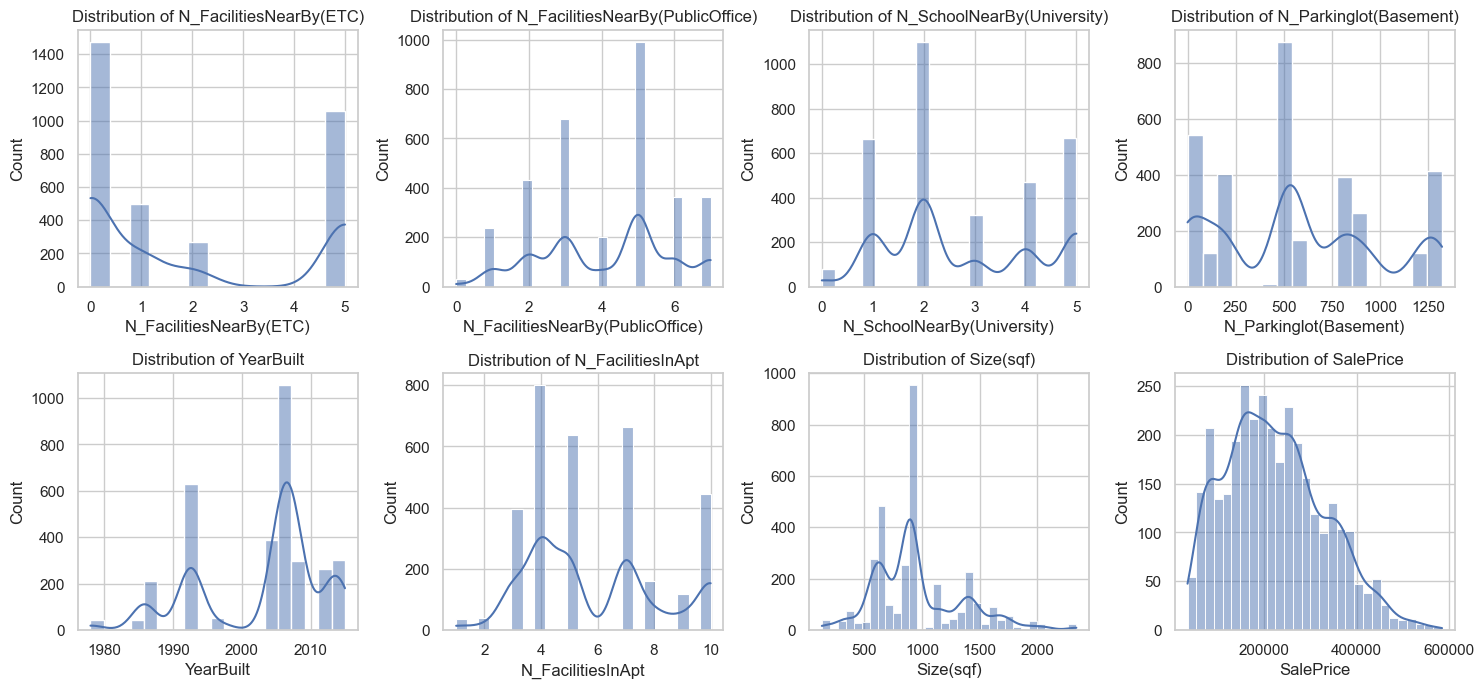

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Creating a list of numeric columns for distribution analysis
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Plotting the distributions of numeric columns
plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()

Based on the data distribution visualization above, here are some insights that we can gain:

- **N_FacilitiesNearBy(ETC)**: This data shows that the majority of properties have few or no additional facilities around them, with a small number of properties having up to 5 additional facilities.
- **N_FacilitiesNearBy(PublicOffice)**: The distribution shows a wider variation in the number of public office facilities around a property, with peaks at properties that have 2 and 5 facilities nearby.
- **N_SchoolNearBy(University)**: Most properties are located near a university or two, indicating they may appeal to the student rental market or families who value easily accessible higher education.
- **N_Parkinglot(Basement)**: This distribution is heavily skewed to the right, with most properties having a relatively small number of parking spaces, but with some properties offering a large number of parking spaces.
- **YearBuilt**: There is a peak in the distribution of properties built around the 2000s, indicating that there may have been a construction or apartment building boom during that period.
- **N_FacilitiesInApt**: Most properties appear to have a relatively small number of amenities in the apartment, with some properties offering more.
- **Size(sqf)**: Property sizes tend to cluster around lower values, with most properties being relatively moderate in size, and only a few being very large.
- **SalePrice**: Sales prices show a distribution that is skewed to the right, indicating that most properties are in the lower price range, with some properties having very high sale prices. This also indicates the presence of potential outliers at the right end of the distribution that may require further attention.

This insight can be used to determine price adjustment strategies, understand different market segments, and design appropriate marketing strategies. For example, a real estate agent may target properties with certain amenities that the market prefers or may recommend improvements to increase the resale value of properties with fewer amenities.

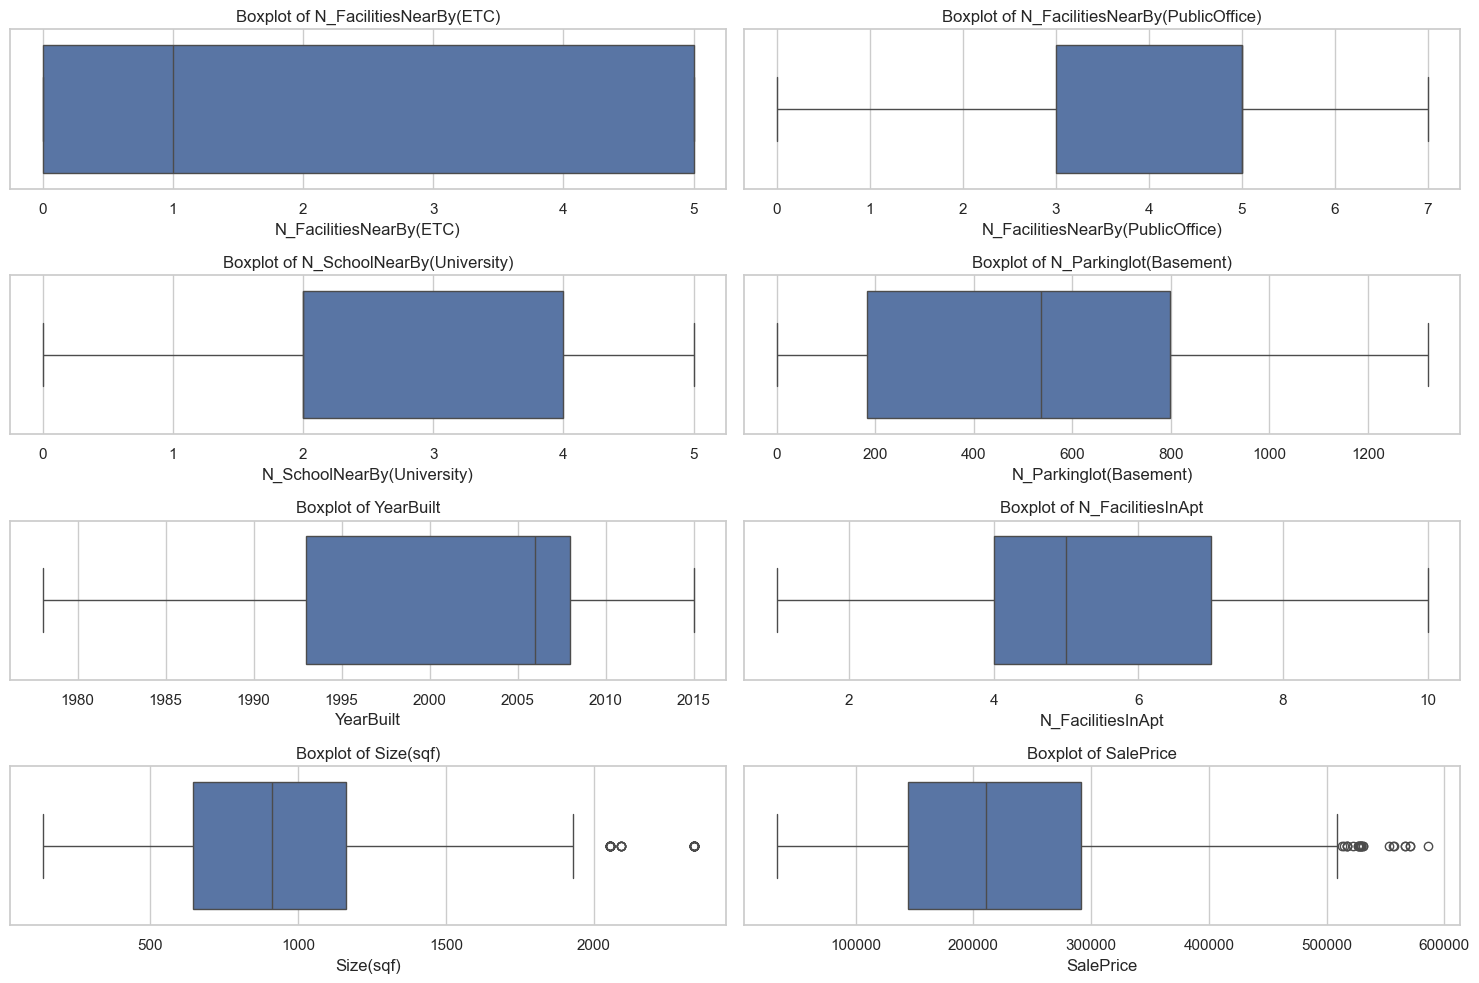

In [6]:
# Creating boxplots for the numerical variables
plt.figure(figsize=(15, 10))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

Here is a boxplot for each numeric variable in the property dataset in Daegu:

- **HallwayType**: This boxplot provides an overview of the distribution of hallway types in an apartment, including their variations and ranges.
- **TimeToSubway**: This boxplot shows the distribution of the time required to reach the nearest train station, focusing on the median and time range.
- **SubwayStation**: This boxplot displays the distribution of properties based on their proximity to a particular train station, highlighting variations and outliers.
- **N_FacilitiesNearBy(ETC)**: This boxplot depicts the distribution of the number of additional amenities near the property, including medians and outliers.
- **N_FacilitiesNearBy(PublicOffice)**: This boxplot shows the distribution of the number of public office facilities near the property, focusing on variations and extremes of the data.
- **N_SchoolNearBy(University)**: This boxplot displays the distribution of the number of universities near the property, highlighting ranges and outliers.
- **N_Parkinglot(Basement)**: This boxplot depicts the number of parking spaces in a property's basement, including median, quartiles, and outliers.
- **YearBuilt**: This boxplot shows the year the property was built, providing insight into the age distribution of the building.

This boxplot provides useful insight into the numerical characteristics of properties in Daegu, including distribution, median, range, and the presence of outliers that may influence the analysis. This is important for understanding real estate market dynamics and identifying areas that may require further investigation.

Let's create a count plot for each categorical variable in the dataset. Count plots are very useful for visualizing the frequency or number of observations in each category. This helps in understanding how common or rare a particular category is in the dataset. We will see count plots for the categorical variables 'HallwayType', 'TimeToSubway', and 'SubwayStation'. Let's see how these categories are distributed in the Daegu property dataset.

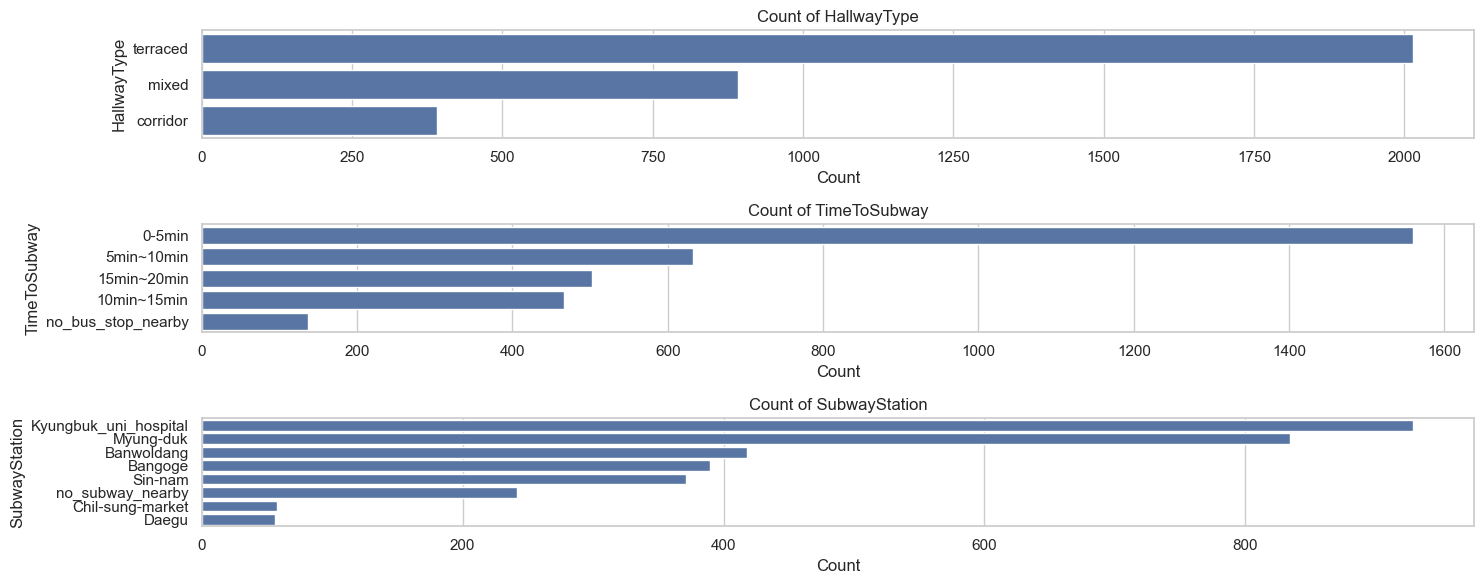

In [7]:
# Creating count plots for categorical variables
categorical_columns = ['HallwayType', 'TimeToSubway', 'SubwayStation']

plt.figure(figsize=(15, 2 * len(categorical_columns)))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i)
    sns.countplot(y=data[column], order = data[column].value_counts().index)
    plt.title(f'Count of {column}')
    plt.xlabel('Count')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

Based on the visualization of the distribution of categorical data provided, here are some insights that we can gain:
- **HallwayType**: The "terraced" hallway type is the most common, followed by "mixed" and "corridor". These preferences may reflect current design trends or the comfort associated with a particular type of hallway. For example, a "terraced" hallway may be preferred for privacy or aesthetics.
- **TimeToSubway**: Most properties are within a "0-5min" walk from a train station, indicating that public transport accessibility is a major factor in property selection. Properties with further access ("15min-20min" and "10min-15min") are fewer, which may affect their resale value.
- **SubwayStation**: "Kyungbuk_uni_hospital" station is the most frequently closest to the listed property, followed by "Myung-duk" and "Banwoldang". This suggests that the area around the station may be a highly desirable location or have a lot of new property development. In contrast, stations such as “Chil-sung-market” and “Daegu” are less frequently closest to listed properties, which could indicate areas with fewer real estate options or lower demand.

These insights are important for real estate agents who can use this information to adjust their marketing and pricing strategies. Properties with "terraced" alley types may be priced higher, while less ideal locations from public transportation may require a more competitive pricing strategy to attract buyers. Knowledge of popular train stations can also help real estate agents in targeting their ads or in making recommendations to potential buyers.

## **Data Correlation**
The resulting correlation matrix and heatmap will provide insight into how strong the relationship is between various numerical variables. It's important to understand the factors that may influence a property's price and other characteristics. Let's look at the correlation heatmap.

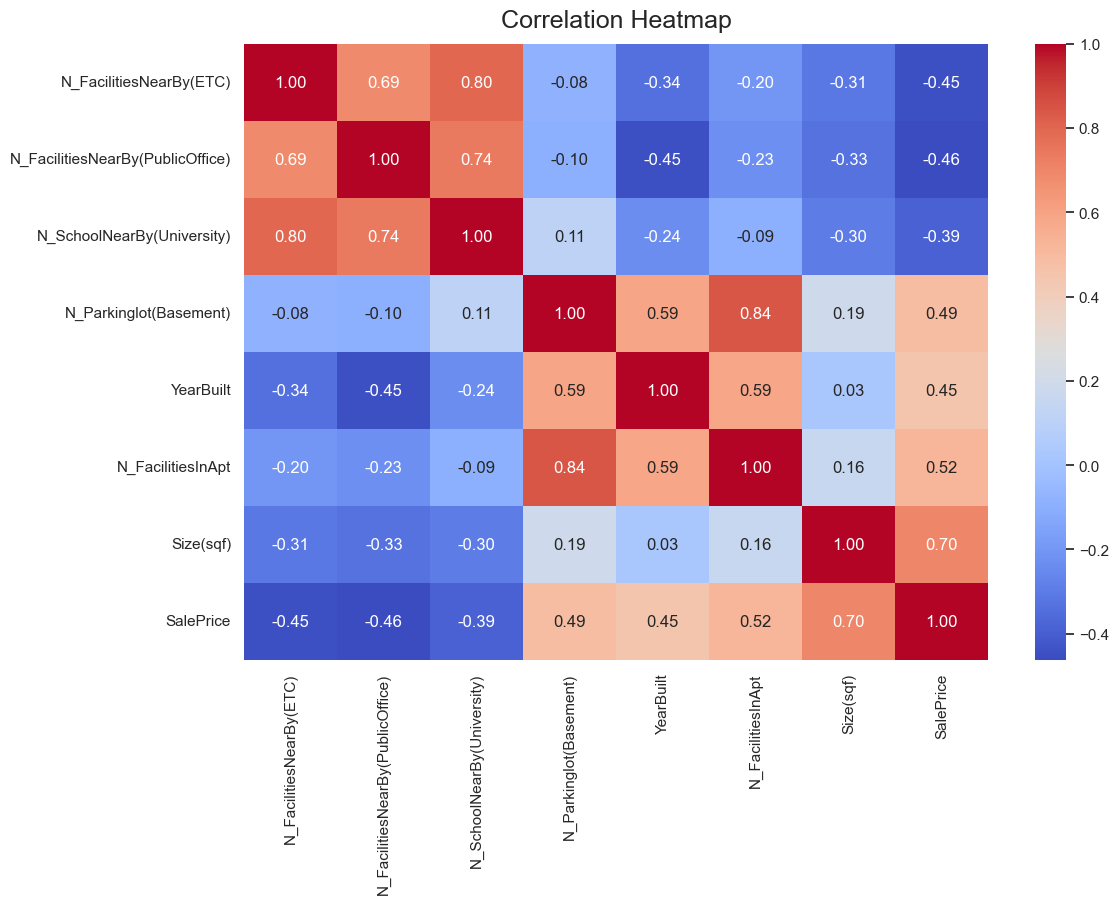

In [8]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Calculating the correlation matrix for the numeric variables in the dataset
correlation_matrix = data.corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.show()


Based on the correlation heatmap above, here are some insights about the relationship between variables in the dataset:
- **Nearest Facilities (ETC, PublicOffice, University)**:<br>
There is a strong and positive correlation between the number of nearby facilities (ETC, PublicOffice, and University). This suggests that if a property is close to one type of facility, it is likely to be close to another.
- **YearBuilt and N_FacilitiesInApt**:<br>
Year built (YearBuilt) has a moderate positive correlation with the number of amenities within the apartment (N_FacilitiesInApt), indicating that newer properties tend to have more internal amenities.
- **YearBuilt and SalePrice**:<br>
There is a moderate positive correlation between year built and sales price, which could indicate that newer properties may sell for higher prices.
- **Size and SalePrice**:<br>
Property size (Size(sqf)) has a strong positive correlation with sale price (SalePrice), confirming that property size is an important factor in determining the sale price of a property.
- **Nearest Facilities and SalePrice**:<br>
There is no significant correlation between the number of nearby facilities (ETC, PublicOffice, University) and the selling price, indicating that the presence of these facilities may not have a strong direct influence on the selling price of the property.
- **N_Parkinglot(Basement) and SalePrice**:<br>
The number of parking spaces in the basement (N_Parkinglot(Basement)) shows a weak positive correlation with sales price, indicating that the availability of parking spaces may not be the main determining factor in setting property prices.

In the context of the real estate business, these correlations can help in understanding the factors that most influence sales prices and guide real estate agents in determining which aspects of a property should be emphasized in advertising or improvements to increase sales value. Real estate agents may also need to further investigate the relationship between these variables and sales price to develop a more informed and strategic pricing strategy.

## **Bivariate Analysis**

We will plot the relationship between each numeric variable and the sale price (SalePrice) in the Daegu property dataset. This scatterplot will help us understand how each numerical variable relates to sales price. This is important to identify factors that may have a strong influence on the sale price of the property. Let's look at the relationship plot.

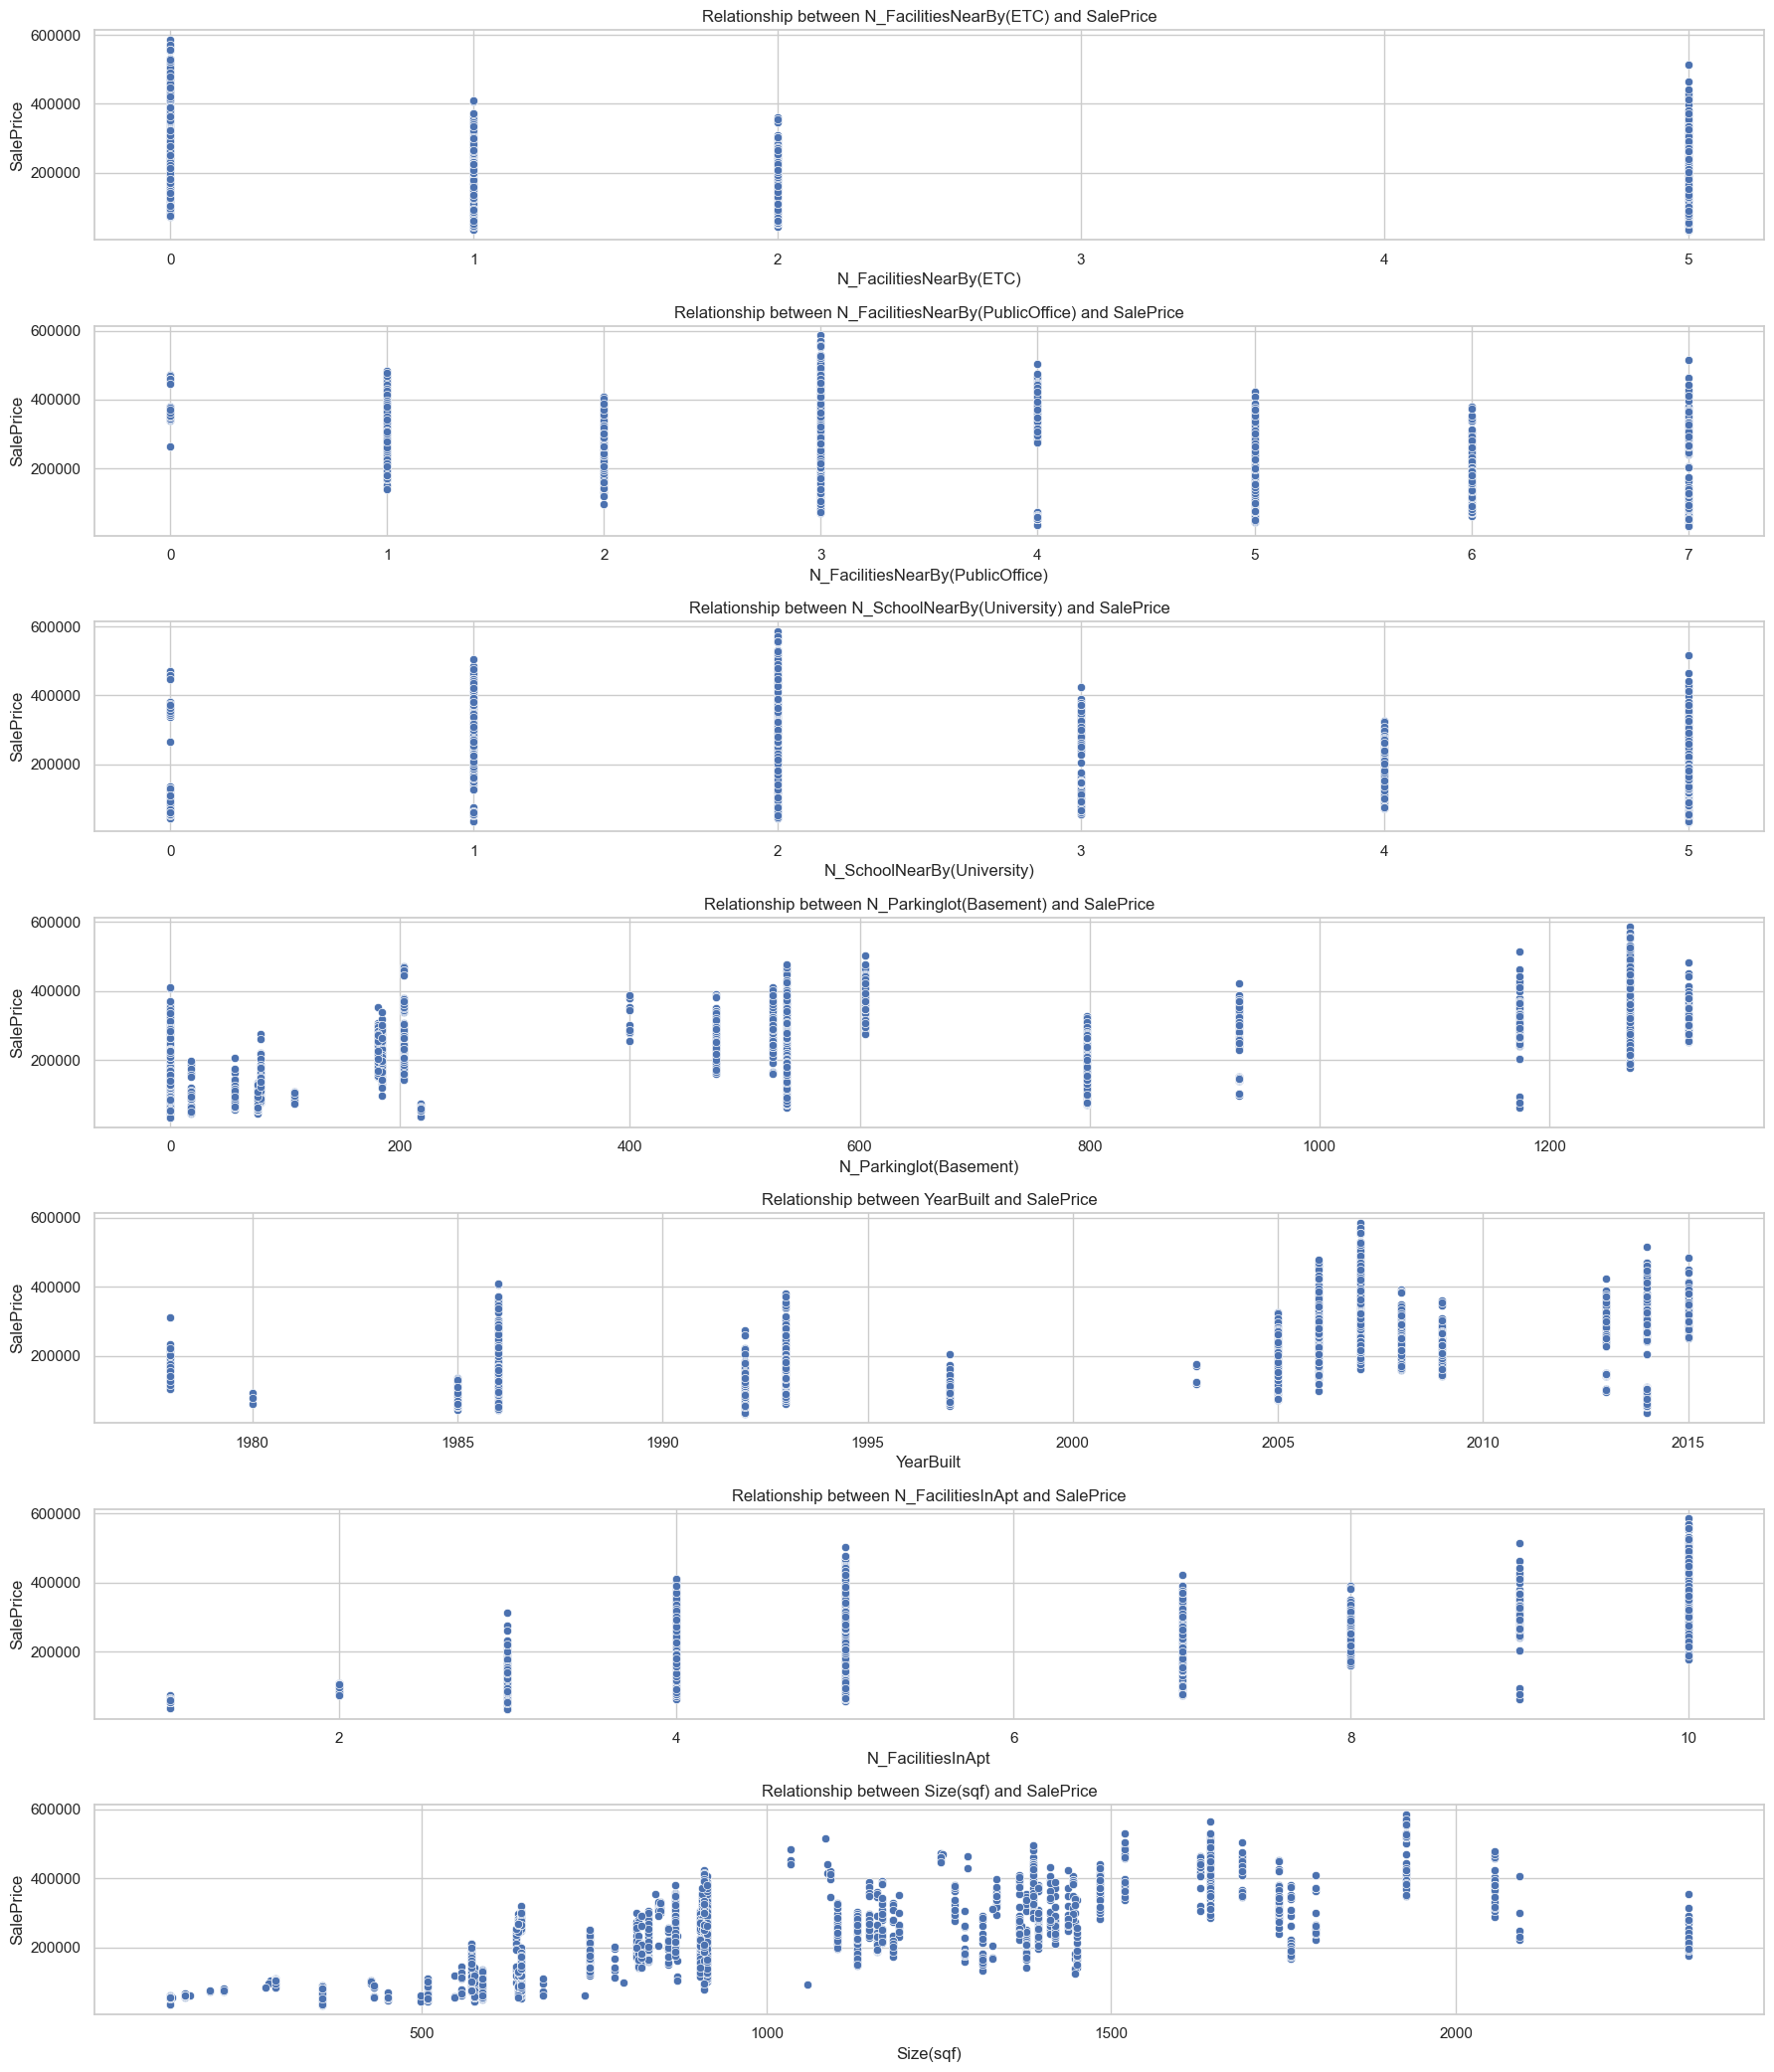

In [9]:
import seaborn as sns

# Prepare a list of numeric and categorical columns for analysis
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_columns.remove('SalePrice')  # Remove the target variable from the numeric columns list
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Plotting the numeric features
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(18, 3*len(numeric_columns)))
for i, col in enumerate(numeric_columns):
    sns.scatterplot(data=data, x=col, y='SalePrice', ax=axes[i])
    axes[i].set_title(f'Relationship between {col} and SalePrice')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('SalePrice')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()



From the visualization above, the following are several insights that can be drawn regarding the relationship between features and selling price (SalePrice):
- **N_FacilitiesNearBy(ETC)**: There is no clear pattern showing an increase or decrease in sales price based on the number of additional facilities near the property. All facility categories show a wide range of selling prices.
- **N_FacilitiesNearBy****(PublicOffice)**: Similar to ETC facilities, there is no clear trend linking the number of public office facilities to sales prices. However, there appears to be a slight increase in sales prices on properties with 2 or 3 amenities nearby.
- **N_SchoolNearBy(University)**: There is no clear correlation between the number of nearby universities and the sale price. However, there are highly-priced properties in the category with one university nearby.
- **N_Parkinglot(Basement)**: Properties with a limited number of parking spaces in the basement appear to have greater price variation compared to those with fewer parking spaces, which may suggest that parking could be a valued feature in determining the sales price.
- **YearBuilt**: There is a wide spread of sales prices across build years. Properties built in certain periods appear to command higher prices, which may indicate that buyers may be taking into account factors such as the age of the building, current architectural designs, or building materials when considering a purchase.
- **N_FacilitiesInApt**: There is no clear relationship between the number of facilities in the apartment and the selling price. Although there are some properties with many amenities that sell at higher prices, the price distribution shows significant variations across categories.
- **Size(sqf)**: There is a clearer positive trend between property size and sale price, with larger properties tending to sell for higher prices. However, for a given size of property, there is wide price variation, indicating that other factors also play an important role in pricing.

The insights generated from this visualization show that while some features have a clearer relationship to sale price (e.g., property size), other relationships may be more complex and influenced by a combination of factors. Further analysis, perhaps with a multivariate predictive model, is needed to understand how significant each feature is in predicting sales price and how they interact with each other.

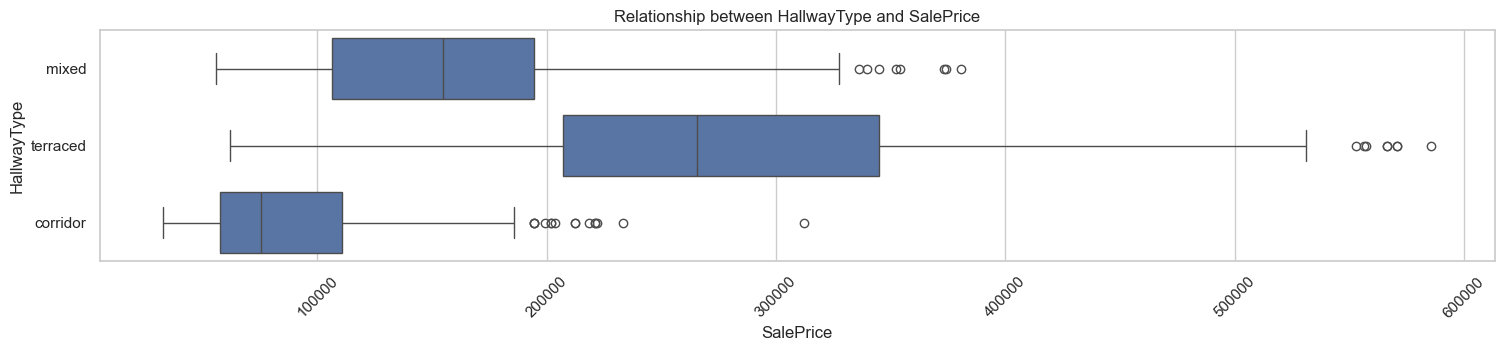

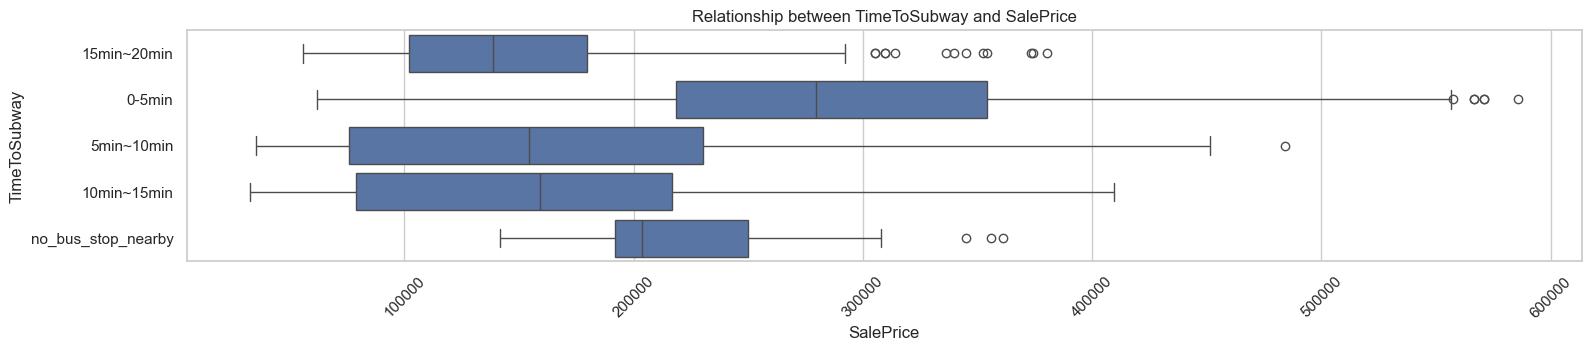

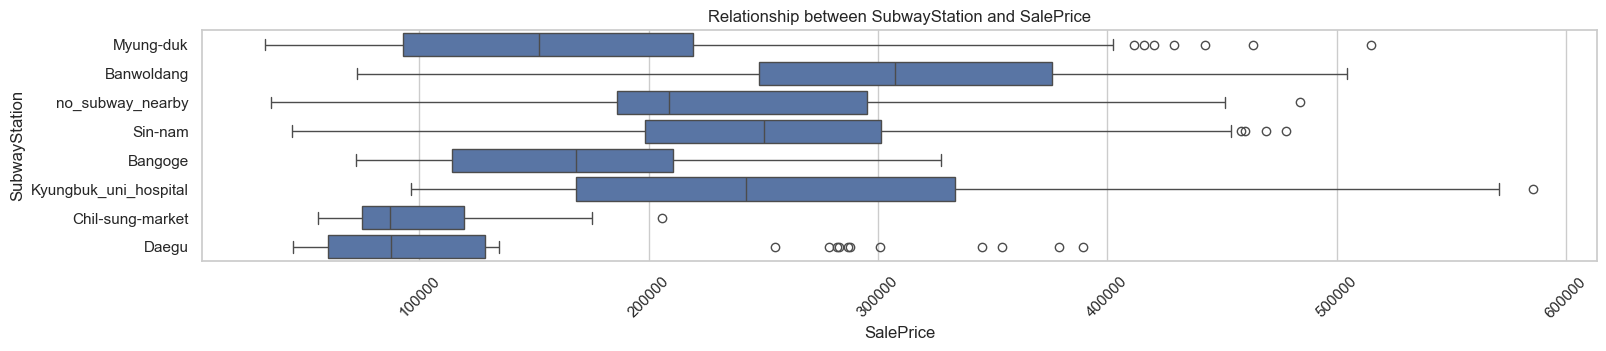

In [10]:
# Generating horizontal box plots for categorical variables
for col in categorical_columns:
    plt.figure(figsize=(18, 3))
    sns.boxplot(data=data, y=col, x='SalePrice')
    plt.title(f'Relationship between {col} and SalePrice')
    plt.ylabel(col)
    plt.xlabel('SalePrice')
    plt.xticks(rotation=45)
    plt.show()


Based on the boxplots for the relationship between aisle type and selling price, time to train station and selling price, and train station and selling price, here are some insights we can get:
- **Relationship between Hallway Type and Selling Price**:
     - Properties with the "terraced" alley type appear to have a higher median selling price compared to "mixed" and "corridor". This could indicate a market preference or higher quality properties with "terraced" alley types.
     - There are quite a lot of outliers, especially in the "terraced" and "corridor" types, indicating some properties are selling at significantly higher prices than others in the same category. This could be due to unique features or a highly desirable location.
- **Relationship between Time to Train Station and Selling Price**:
     - Properties located within a 5-minute walk of a train station tend to have higher sale prices compared to those located further away. This emphasizes the importance of easy access to public transportation as a factor in property value.
     - There is no significant difference in sales price between properties located at a distance of 10-15 minutes and 15-20 minutes from the station, which may indicate that buyers consider this distance to be the upper limit of walkability to the train station.
- **Relationship between Train Station and Selling Price**:
     - There are significant variations in selling prices between different train stations. Properties close to “Kyungbuk_uni_hospital” and “Myung-duk” stations have a higher price distribution, which may indicate that these areas are more desirable or have a higher quality of life.
     - Stations such as "Daegu" have a lower median price and a narrower distribution, which could indicate that properties in this area are less desirable or have less attractive characteristics than other areas.

# **Data Preparation**
## **Identification and Quantification of Data Problems**

In [11]:
import numpy as np
import pandas as pd
from scipy import stats

# Fungsi untuk menghitung persentase outliers
def calculate_outlier_percentage(column):
    if column.dtype in [np.float64, np.int64]:
        z_scores = np.abs(stats.zscore(column.dropna()))  # Menghitung skor Z, mengabaikan nilai NaN
        return np.sum(z_scores > 3) / len(column) * 100  # Menghitung persentase outliers
    return 0

# Membuat DataFrame dengan informasi yang diinginkan
df_info = pd.DataFrame({
    'Features'           : data.columns.values,
    'Data Type'         : data.dtypes.values,
    'Null Value (%)'     : data.isna().mean().values * 100,
    'Unique Value'          : data.nunique().values,
    'Duplicate Data'         : data.duplicated().sum(),
    'Negative Value': [len(data[col][data[col] < 0]) / len(data) * 100 
                           if col in data.select_dtypes(include=np.number).columns else 0 
                           for col in data.columns],
    'Zero Value Numeric'    : [len(data[col][data[col] == 0]) / len(data) * 100 
                           if col in data.select_dtypes(include=np.number).columns else 0 
                           for col in data.columns],
    'Zero Value Object'    : [len(data[col][data[col] == '']) / len(data) * 100 
                           if col in data.select_dtypes(include=np.object_).columns else 0 
                           for col in data.columns],
    'Outlier(%)'        : [calculate_outlier_percentage(data[col]) for col in data.columns],
    'Unique Sample'     : [data[col].unique() for col in data.columns]
}).round(3)

df_info



,Features,Data Type,Null Value (%),Unique Value,Duplicate Data,Negative Value,Zero Value Numeric,Zero Value Object,Outlier(%),Unique Sample
0,HallwayType,object,0.0,3,994,0.0,0.000,0.0,0.000,"[mixed, terraced, corridor]"
1,TimeToSubway,object,0.0,5,994,0.0,0.000,0.0,0.000,"[15min~20min, 0-5min, 5min~10min, 10min~15min,..."
2,SubwayStation,object,0.0,8,994,0.0,0.000,0.0,0.000,"[Myung-duk, Banwoldang, no_subway_nearby, Sin-..."
3,N_FacilitiesNearBy(ETC),float64,0.0,4,994,0.0,44.694,0.0,0.000,"[5.0, 0.0, 1.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,0.0,8,994,0.0,0.970,0.0,0.000,"[6.0, 4.0, 1.0, 3.0, 7.0, 5.0, 2.0, 0.0]"
5,N_SchoolNearBy(University),float64,0.0,6,994,0.0,2.335,0.0,0.000,"[5.0, 1.0, 2.0, 4.0, 3.0, 0.0]"
6,N_Parkinglot(Basement),float64,0.0,20,994,0.0,12.007,0.0,0.000,"[536.0, 605.0, 1321.0, 475.0, 1174.0, 798.0, 5..."
7,YearBuilt,int64,0.0,16,994,0.0,0.000,0.0,0.000,"[1993, 2007, 2015, 2008, 2014, 2005, 1992, 198..."
8,N_FacilitiesInApt,int64,0.0,9,994,0.0,0.000,0.0,0.000,"[4, 5, 10, 8, 9, 7, 3, 2, 1]"
9,Size(sqf),int64,0.0,86,994,0.0,0.000,0.0,0.728,"[2337, 1334, 914, 644, 829, 910, 572, 1419, 12..."


This table provides an overview of the structure and characteristics of the data in the Daegu property dataset. Some key points include:
- Data Types: Data consists of a mixture of data types, including object (categorical) and numeric (float64 and int64). This variation reflects the diversity of information available in real estate data.
- Data Availability: No columns have null values, indicating data completeness. This is important to ensure accurate and comprehensive analysis
- Cardinality: Each column has a different number of unique values. For example, the HallwayType column has 3 unique values, while SalePrice has 796 unique values. This shows different levels of variation in each aspect of the data.
- Data Duplication: There are 994 rows of data that are duplicated, indicating the potential for information redundancy. It is important to address this duplication so that the analysis is not biased.
- Negative and Zero Values: There are no negative values in the dataset. Some columns, such as N_Parkinglot(Basement), have a significant percentage of zero values, which is worth noting in data interpretation.
- Outliers: There are different percentages of outliers in some columns. For example, Size(sqf) has 0.728% outliers, while SalePrice has 0.243% outliers. Handling these outliers is important to ensure model accuracy.

From this analysis, we can understand that the Daegu property dataset has a wide wealth of information with good data quality in terms of completeness. Variations in data types and cardinality demonstrate the complexity of the Daegu real estate market. Handling duplications and outliers will be a crucial step in further data preparation to ensure that the analysis or predictive models that will be developed later can provide accurate and reliable results.

## **Data Change**
Because many categories are not in the correct format, we have made changes to these categories.

In [12]:
data['SalePrice'].min()

32743

In [13]:
data['SalePrice'].max()

585840

In [14]:
data['TimeToSubway'] = data['TimeToSubway'].replace({
    '10min~15min': '10-15min',
    '15min~20min': '15-20min',
    '5min~10min': '5-10min'
})

data['TimeToSubway'].unique()

array(['15-20min', '0-5min', '5-10min', '10-15min', 'no_bus_stop_nearby'],
      dtype=object)

In [15]:
data['SubwayStation'] = data['SubwayStation'].replace({
    'Kyungbuk_uni_hospital': 'Kyungbuk-uni-hospital'
})

data['SubwayStation'].unique()

array(['Myung-duk', 'Banwoldang', 'no_subway_nearby', 'Sin-nam',
       'Bangoge', 'Kyungbuk-uni-hospital', 'Chil-sung-market', 'Daegu'],
      dtype=object)

## **Handling Data Anomalies**

In [16]:
# Group the data by 'SubwayStation' and 'TimeToSubway', and calculate the size of each group
grouped_data = data.groupby(['SubwayStation', 'TimeToSubway']).size()

# Calculate the total size of the data
total_size = data.shape[0]

# Calculate the percentage
percentage_data = grouped_data / total_size * 100

# Print the percentage data
percentage_data

SubwayStation          TimeToSubway      
Bangoge                5-10min               11.825349
Banwoldang             0-5min                11.491813
                       5-10min                1.182535
Chil-sung-market       15-20min               1.758642
Daegu                  5-10min                1.697999
Kyungbuk-uni-hospital  0-5min                19.678593
                       10-15min               8.489994
Myung-duk              0-5min                 6.185567
                       10-15min               5.639782
                       15-20min              13.462705
Sin-nam                0-5min                 9.945421
                       5-10min                1.303820
no_subway_nearby       5-10min                3.183748
                       no_bus_stop_nearby     4.154033
dtype: float64

Because there are data anomalies in the no_subway_nearby category, we will discard these anomalies.

In [17]:
# Filter data yang tidak sesuai
invalid_entries = data[(data['SubwayStation'] == 'no_subway_nearby') & (data['TimeToSubway'] != 'no_bus_stop_nearby')]

# Periksa entri yang tidak sesuai
print(invalid_entries)

# Drop invalid entries from data
data = data.drop(invalid_entries.index)

     HallwayType TimeToSubway     SubwayStation  N_FacilitiesNearBy(ETC)  \
2825    terraced      5-10min  no_subway_nearby                      0.0   
1793    terraced      5-10min  no_subway_nearby                      0.0   
3318    terraced      5-10min  no_subway_nearby                      0.0   
2941    terraced      5-10min  no_subway_nearby                      0.0   
1929    terraced      5-10min  no_subway_nearby                      0.0   
...          ...          ...               ...                      ...   
2062    corridor      5-10min  no_subway_nearby                      1.0   
763     terraced      5-10min  no_subway_nearby                      0.0   
201     terraced      5-10min  no_subway_nearby                      0.0   
600     corridor      5-10min  no_subway_nearby                      1.0   
2068    terraced      5-10min  no_subway_nearby                      0.0   

      N_FacilitiesNearBy(PublicOffice)  N_SchoolNearBy(University)  \
2825             

## **Handling Duplicate Data**:
- **Recommendation**: Remove duplicate rows to ensure that the model to be built is not biased due to redundant information.
- **Reason**: Duplicated rows can cause model overfitting, where the model overfits the training data and does not generalize well to new data.

In [18]:
# Menghapus baris yang terduplikasi
data_cleaned = data.drop_duplicates()

# Menghitung jumlah total baris sebelum dan sesudah penghapusan
total_rows_before = data.shape[0]
total_rows_after = data_cleaned.shape[0]

# Menghitung persentase baris yang dihapus
percentage_removed = ((total_rows_before - total_rows_after) / total_rows_before) * 100

total_rows_before, total_rows_after, percentage_removed


(3193, 2227, 30.25367992483558)

Before dropping duplicate data, the dataset had a total of 3,193 rows. After removing duplicate rows, the number of rows reduces to 2,227. This means that about 30.25% of the original dataset was removed because it was duplicate data.

## **Handling Outliers**:

At this stage we will check the data for outliers. The goal is to see anomalous data or errors in the data (wrong input). In the process, if we find outlier data that is too far from other data, we may delete it. The goal is to improve the quality of machine learning and reduce data diversity.

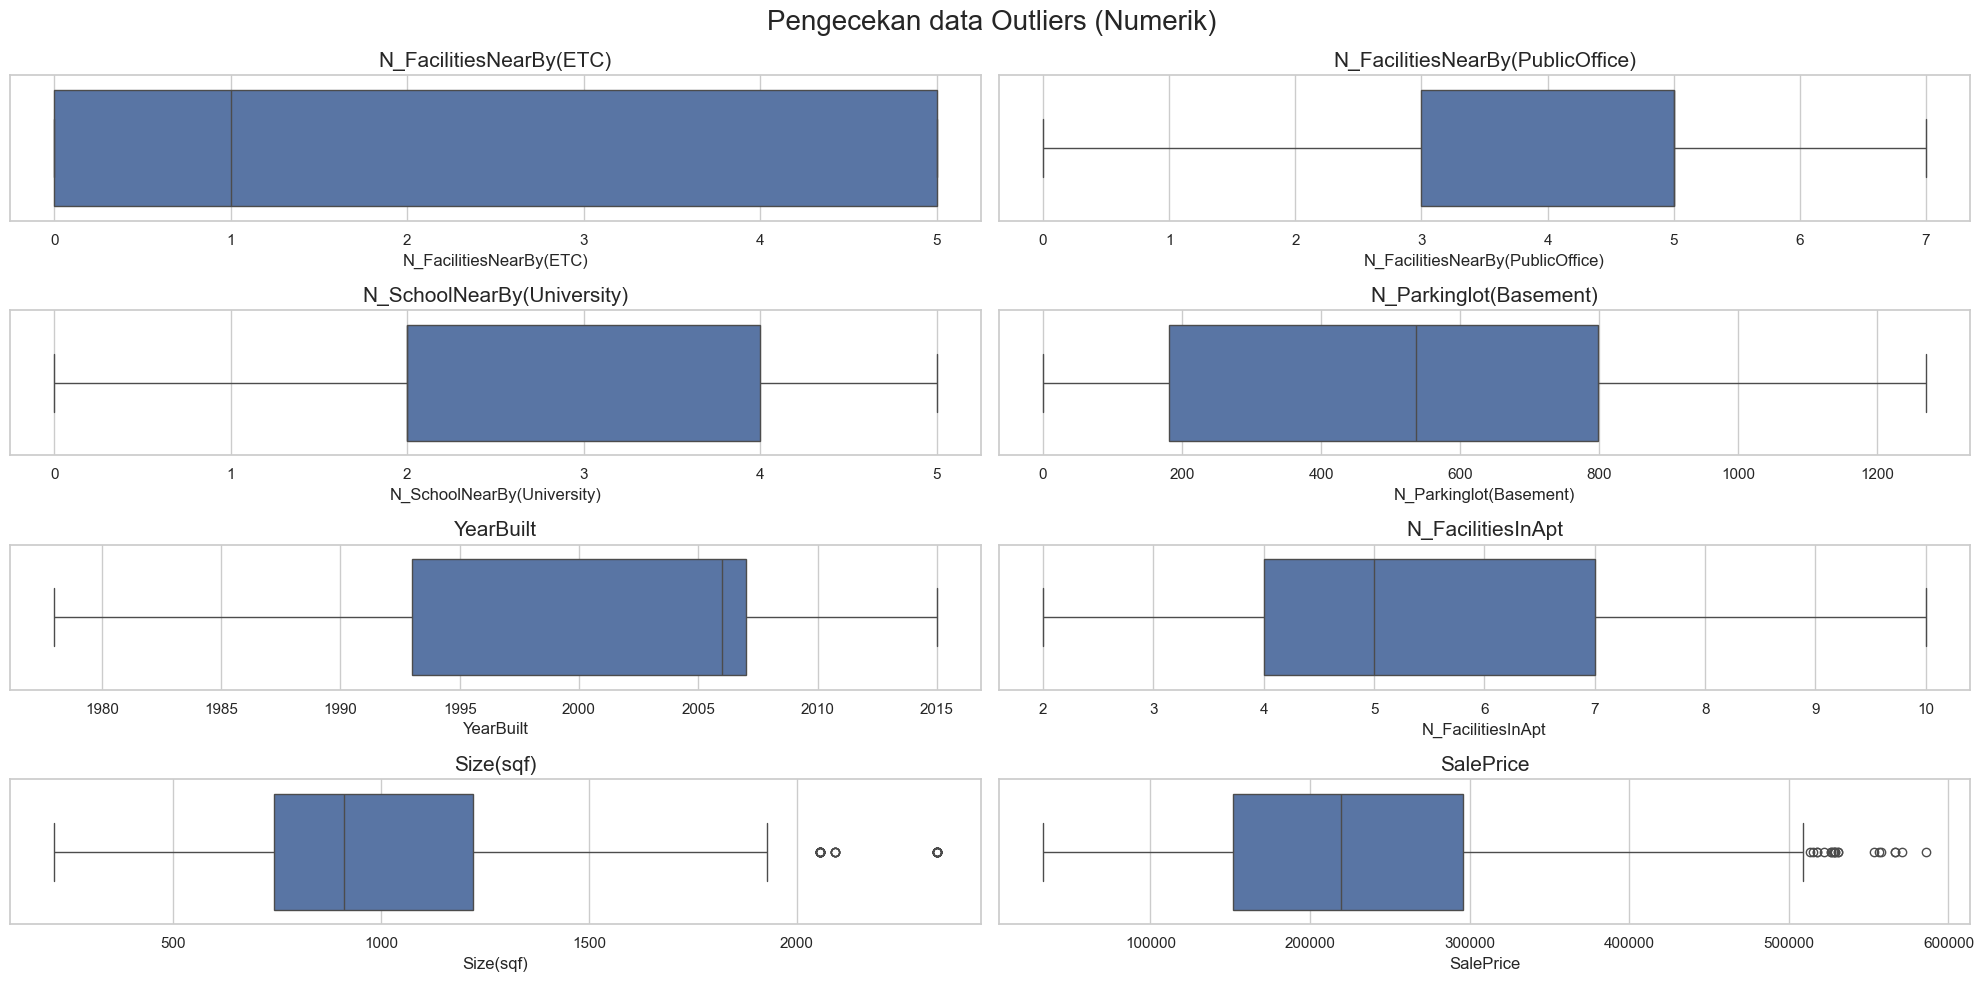

In [19]:
num_feature = data_cleaned.describe().columns
plot = 1

plt.figure(figsize=(20,10))
for feature in num_feature:
    plt.subplot(4,2,plot)
    sns.boxplot(data=data_cleaned, x=feature)
    plt.title(feature, size=15)
    plt.tight_layout()
    plot += 1

plt.suptitle('Pengecekan data Outliers (Numerik)', size=20)
plt.tight_layout()
plt.show()

In [20]:
# Create a function to check for outliers
def outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    print(f'IQR: {iqr}')

    batas_bawah = q1 - (iqr * 1.5)
    batas_atas = q3 + (iqr * 1.5)
    print(f'batas_bawah : {batas_bawah}')
    print(f'batas_atas : {batas_atas}')  
    
# Calculates the lower limit and upper limit
q1 = data_cleaned['Size(sqf)'].quantile(0.25)
q3 = data_cleaned['Size(sqf)'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (iqr * 1.5)
upper_bound = q3 + (iqr * 1.5)

# Displays outliers information
print("Checking for outliers in the column Size(sqf)")
outliers(data_cleaned['Size(sqf)'])
print("Number of data outliers:", len(data_cleaned[(data_cleaned['Size(sqf)'] < lower_bound) | (data_cleaned['Size(sqf)'] > upper_bound)]))
print("Percentage of data outliers:", round(((len(data_cleaned[(data_cleaned['Size(sqf)'] < lower_bound) | (data_cleaned['Size(sqf)'] > upper_bound)]) / len(data_cleaned)) * 100), 2), "%")

# Removes outliers
data_cleaned = data_cleaned[(data_cleaned['Size(sqf)'] >= lower_bound) & (data_cleaned['Size(sqf)'] <= upper_bound)]

# Displays information after removal of outliers
print("After removal of outliers:")
outliers(data_cleaned['Size(sqf)'])

Checking for outliers in the column Size(sqf)
IQR: 479.0
batas_bawah : 24.5
batas_atas : 1940.5
Number of data outliers: 45
Percentage of data outliers: 2.02 %
After removal of outliers:
IQR: 424.0
batas_bawah : 107.0
batas_atas : 1803.0


In [21]:
# Calculates the lower limit and upper limit
q1_saleprice = data_cleaned['SalePrice'].quantile(0.25)
q3_saleprice = data_cleaned['SalePrice'].quantile(0.75)
iqr_saleprice = q3_saleprice - q1_saleprice
lower_bound_saleprice = q1_saleprice - (iqr_saleprice * 1.5)
upper_bound_saleprice = q3_saleprice + (iqr_saleprice * 1.5)

# Displays outliers information
print("Checking for outliers in the SalePrice column")
outliers(data_cleaned['SalePrice'])
print("Number of data outliers:", len(data_cleaned[(data_cleaned['SalePrice'] < lower_bound_saleprice) | (data_cleaned['SalePrice'] > upper_bound_saleprice)]))
print("Percentage of data outliers:", round(((len(data_cleaned[(data_cleaned['SalePrice'] < lower_bound_saleprice) | (data_cleaned['SalePrice'] > upper_bound_saleprice)]) / len(data_cleaned)) * 100), 2), "%")

# Displays information after removal of outliers
print("After removal of outliers:")
outliers(data_cleaned['SalePrice'])


Checking for outliers in the SalePrice column
IQR: 141593.0
batas_bawah : -61947.5
batas_atas : 504424.5
Number of data outliers: 21
Percentage of data outliers: 0.96 %
After removal of outliers:
IQR: 141593.0
batas_bawah : -61947.5
batas_atas : 504424.5


There are important findings regarding outliers in two columns, namely SalePrice and Size. In the SalePrice column, 17 data outliers were found which is equivalent to 0.63% of the total data. This outlier data includes terraced-type apartments, with a distance to the underground station of less than 5 minutes and a significant area. Even though the numbers are relatively small, it was decided not to delete this data because it was considered representative and did not constitute an input error.

Meanwhile, in the Size column, 45 outliers were found, representing 2.02% of the total data, with a maximum value of 2337 sqf. Even though the numbers are higher, this value range is not too far from other data. Based on domain knowledge, apartment unit sizes up to 2335 sqf are still considered reasonable. Therefore, it was decided to retain these outliers in the Size column. This allows the model to still be able to predict prices for apartment units that have an area above 1803 sqf.

By considering these two things, it is hoped that the decision to retain outliers in both columns will not cause significant bias in the model. This is expected to improve the model's ability to predict apartment prices with unique characteristics such as terraced type and large size.

### **Cardinality**

In [22]:
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns

def check_cardinality(data_cleaned):
    for feature in categorical_cols:
        cardinality = len(data_cleaned[feature].unique())
        print(f"Cardinality of {feature}: {cardinality}")

        if cardinality > 10:
            print(f"Warning: High cardinality in {feature}. Consider handling it appropriately.")

check_cardinality(data_cleaned)


Cardinality of HallwayType: 3
Cardinality of TimeToSubway: 5
Cardinality of SubwayStation: 8


After checking the cardinality of the categorical columns in the dataset, here are the results:
- HallwayType: Cardinality 3. There is no high cardinality warning for this column.
- TimeToSubway: Cardinality 5. There is no high cardinality warning for this column.
- SubwayStation: Cardinality 8. There is no high cardinality warning for this column.

There are no categorical columns with high cardinality (more than 10 unique values) in this dataset. This means there is no immediate need to address the high cardinality issue, such as with coding or clustering techniques, for those columns. ​

### **Rare Labels**

In [23]:
import tabulate 

# Identifying categorical columns from 'data_cleaned'
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns.tolist()

# Calculate the frequency distribution for each categorical variable in percentages
label_frequency_percent = {col: data_cleaned[col].value_counts(normalize=True) * 100 for col in categorical_columns}

# Membuat list bertingkat untuk digunakan dengan tabulate
data_for_tabulate = []

# Fill in data for tabulate
for variable, freq_series in label_frequency_percent.items():
    data_for_tabulate.append([variable, freq_series.index[0], f"{freq_series.iloc[0]:.2f}%"])
    for idx in range(1, len(freq_series)):
        data_for_tabulate.append(["", freq_series.index[idx], f"{freq_series.iloc[idx]:.2f}%"])

# Displays the frequency distribution in percentages using tabulate
tabulate_data = tabulate.tabulate(data_for_tabulate, headers=["Variable", "Category", "Frequency (%)"], tablefmt="pipe")
print(tabulate_data)


| Variable      | Category              | Frequency (%)   |
|:--------------|:----------------------|:----------------|
| HallwayType   | terraced              | 61.32%          |
|               | mixed                 | 26.12%          |
|               | corridor              | 12.56%          |
| TimeToSubway  | 0-5min                | 47.71%          |
|               | 10-15min              | 16.64%          |
|               | 5-10min               | 16.36%          |
|               | 15-20min              | 15.17%          |
|               | no_bus_stop_nearby    | 4.12%           |
| SubwayStation | Kyungbuk-uni-hospital | 26.86%          |
|               | Myung-duk             | 26.58%          |
|               | Sin-nam               | 13.52%          |
|               | Banwoldang            | 13.38%          |
|               | Bangoge               | 10.95%          |
|               | no_subway_nearby      | 4.12%           |
|               | Chil-sung-market      

Based on the frequency of categories in the HallwayType, TimeToSubway, and SubwayStation variables, here are some insights that can be drawn:

- Hallway Type (HallwayType):

     - The majority of apartments (62.17%) have a 'terrace' type of hallway, indicating the preference or prevalence of this design in Daegu.
     - The 'mixed' type of hallway is also quite common, accounting for 25.24% of the total apartments.
     - The 'corridor' type of hallway is less common (12.58%), which may reflect design trends or market preferences.
- Time to Subway (TimeToSubway):

     - Almost half of the apartments (46.48%) are located close to a subway station (0-5 minutes). This indicates that accessibility to public transportation, especially the subway, is an important factor in the Daegu property market.
     - The frequency of apartments located within 5-10 minutes and 10-15 minutes of the subway is also significant, 18.76% and 16.25% respectively.
     - Only a small proportion of apartments (3.75%) do not have a nearby bus stop, indicating that the majority of properties have good access to public transport.
- Subway Station (SubwayStation):

     - Two subway stations, namely 'Kyungbuk_uni_hospital' and 'Myung-duk', are each the closest location for 25.66% of the apartments. This can indicate these areas are popular locations or have a lot of property development.
     - 'Sin-nam' and 'Banwoldang' stations are also quite popular, with 14.23% and 12.47% of apartments located nearby respectively.
     - Stations such as 'Chil-sung-market' and 'Daegu' have lower frequencies, which may indicate the area is less desirable or has less property development.

Meanwhile, the importance of maintaining and analyzing rare-labels or infrequently occurring categories cannot be ignored. Although some categories such as certain subway stations or aisle types may be rare, they may be particularly important to certain market segments or offer unique opportunities.

## **Collinearity**

To provide an interpretation that shows that there is no need to handle collinearity, I need to see the results of the Variance Inflation Factor (VIF) calculation that you did. VIF is a measure that shows how big the collinearity is between the independent variables in the regression model. High VIF values indicate the presence of strong collinearity, which can interfere with model estimation and interpretation.

In general, the guidelines for interpreting VIF values are as follows:

- VIF = 1: There is no collinearity between independent variables.
- 1 < VIF < 5: Moderate collinearity, usually not a cause for concern.
- VIF >= 5: High collinearity, may need to be addressed.

Let's check the VIF

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataframe):
    # Select only columns that are numeric
    features = data_cleaned[numeric_columns]

    # Calculate VIF for each variable
    vif_data = pd.DataFrame()
    vif_data["Variable"] = features.columns
    vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

    return vif_data

vif_result = calculate_vif(data)
print(vif_result)


                           Variable        VIF
0           N_FacilitiesNearBy(ETC)   5.833258
1  N_FacilitiesNearBy(PublicOffice)  14.430532
2        N_SchoolNearBy(University)  17.794452
3            N_Parkinglot(Basement)  12.303106
4                         YearBuilt  40.818841
5                 N_FacilitiesInApt  28.015370
6                         Size(sqf)  12.589761


N_FacilitiesNearBy(ETC), N_FacilitiesNearBy(PublicOffice), N_SchoolNearBy(University), N_Parkinglot(Basement), YearBuilt, N_FacilitiesInApt, Size(sqf): All of these variables have quite high VIF values, with some of them well exceeding 5, indicating the presence of collinearity tall. In particular, YearBuilt and N_FacilitiesInApt have very high VIFs, which could indicate that these variables are highly dependent on each other.

In the context of the real estate business in Daegu, this collinearity may indicate that several apartment features such as size, facilities, and year of construction, have a close relationship in determining sales value. For example, newer apartments tend to have more amenities, which can also affect the size of the apartment.

However, considering the business context and purpose of this analysis, it may not be necessary to eliminate these variables even if they show high collinearity. This is because each variable may have its own importance in determining selling prices and can provide valuable insights for predictive models. Thus, even if collinearity exists, business considerations and the context of the analysis must be taken into account in deciding whether these variables need to be changed or removed.

## **Feature Engineering**:

To create a pipeline with specific feature creation and feature selection, the steps will include creating new features that are relevant to the real estate market context in Daegu and selecting features based on their performance in predicting selling prices.

In [25]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, OrdinalEncoder, RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from category_encoders import OrdinalEncoder as ce_OrdinalEncoder

# Column data type
numeric_features = ['Size(sqf)', 'YearBuilt', 'N_FacilitiesNearBy(ETC)', 'N_Parkinglot(Basement)']
categorical_features = ['HallwayType', 'SubwayStation']
ordinal_features = ['TimeToSubway']


# Mapping for ordinal encoders
ordinal_map = [{'col':'TimeToSubway',
                'mapping':{'no_bus_stop_nearby':1, 
                           '15min-20min':2, 
                           '10min-15min':3, 
                           '5min-10min':4,
                           '0-5min':5}}]

# Preprocessor for encoding dan scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('ord', ce_OrdinalEncoder(mapping=ordinal_map), ordinal_features)
    ],
    remainder='passthrough'
)
# Pipeline for feature engineering
feature_engineering_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),

])

# Main pipeline with regression models
pipeline = Pipeline(steps=[
    ('feature_engineering', feature_engineering_pipeline),
])
pipeline

Pipeline(steps=[('feature_engineering',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('num',
                                                                   RobustScaler(),
                                                                   ['Size(sqf)',
                                                                    'YearBuilt',
                                                                    'N_FacilitiesNearBy(ETC)',
                                                                    'N_Parkinglot(Basement)']),
                                                                  ('cat',
                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                   ['HallwayType',
                                                                    'SubwayStation']),
                                                                  ('ord',
                                                                   OrdinalEncoder(mapping=[{'col': 'TimeToSubway',
                                                                                            'data_type': dtype('O'),
                                                                                            'mapping': no_bus_stop_nearby    1
15min-20min           2
10min-15min           3
5min-10min            4
0-5min                5
dtype: int64}]),
                                                                   ['TimeToSubway'])]))]))])

In the context of machine learning, "feature engineering" is the process of creating new features or changing existing features to improve model performance. The feature engineering process is carried out using `Pipeline` in the pycaret library. Here is a step-by-step explanation of the feature engineering process as seen in the code:

1. **ColumnTransformer**: This is the component in the pipeline that is responsible for applying different transformations to different columns of the input data.

2. **RobustScaler**: For numeric features (in code designated as 'num'), `RobustScaler` is used. It is a technique for scaling features based on statistics that are less sensitive to outliers, namely median and interquartile range. This scaling helps the model not be affected by extreme values that might harm model performance.

3. **OneHotEncoder**: For categorical features (marked as 'cat'), `OneHotEncoder` is used. This encoder converts categorical variables into a series of binary variables, allowing the model to more easily process categorical information without assuming order between categories.

4. **OrdinalEncoder**: For ordinal features (marked as 'ord'), `OrdinalEncoder` is used. Ordinal features are category features that have a sequence or level. In the code, `OrdinalEncoder` translates values such as 'TimeToSubway' into an ordinal numerical scale according to a predefined mapping.

5. **Passthrough**: For other features that do not need to be changed or are already in the format desired by the model, the 'passthrough' option is used, which means the feature will be passed without change.

6. **Pipeline**: This entire transformation process is wrapped in a `Pipeline`. This pipeline ensures that each step is executed sequentially and consistently, both when training the model and when making predictions with the trained model.

Overall, the goal of feature engineering is to prepare data in the most suitable format for the model, so that the model can learn more efficiently and accurately. This includes converting raw data into a format that is more informative and easy to process by machine learning algorithms.

# **Modeling**
## **Modeling Setup:**
Initialize the environment in PyCaret with the dataset.

In [26]:
from pycaret.regression import *
from pycaret.regression import setup, create_model

setup(data=data_cleaned, target='SalePrice', preprocess=False, remove_multicollinearity=True, multicollinearity_threshold=0.9, custom_pipeline=pipeline, session_id=123)

,Description,Value
0,Session id,123
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(2182, 11)"
4,Transformed data shape,"(2182, 20)"
5,Transformed train set shape,"(1527, 20)"
6,Transformed test set shape,"(655, 20)"
7,Numeric features,7
8,Categorical features,3


## **Experiment Modeling**

### **Benchmarking Model**
The goal of this step is to compare the different regression models available in PyCaret to determine which model provides the best performance on your data.

In PyCaret, this can be done with the compare_models() function. This function will automatically train and evaluate several different regression models using standard metrics and display the results.

In [27]:
# Run the model and select the 3 best models
top3models = compare_models(n_select=3)
print(top3models)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,38349.0262,2213050513.7318,47023.8387,0.7917,0.2320,0.1993,0.0230
lightgbm,Light Gradient Boosting Machine,38723.9081,2254956289.9843,47463.4512,0.7878,0.2349,0.2009,0.0870
et,Extra Trees Regressor,38676.3052,2256594084.5405,47479.2992,0.7876,0.2356,0.2007,0.0360
dt,Decision Tree Regressor,38692.4560,2260520666.8864,47516.6399,0.7871,0.2359,0.2009,0.0090
rf,Random Forest Regressor,38734.7052,2267940178.8046,47597.0128,0.7865,0.2363,0.2014,0.0460
lr,Linear Regression,41142.8367,2531562695.7227,50298.1305,0.7629,0.2538,0.2150,0.3610
lasso,Lasso Regression,41162.2270,2531871364.1078,50301.2156,0.7629,0.2539,0.2150,0.1630
ridge,Ridge Regression,41205.2343,2531686384.6669,50300.0028,0.7629,0.2536,0.2153,0.0090
llar,Lasso Least Angle Regression,41162.2324,2531871614.2493,50301.2181,0.7629,0.2539,0.2150,0.0080
br,Bayesian Ridge,41280.5481,2534418483.3809,50327.7659,0.7626,0.2535,0.2158,0.0090


[GradientBoostingRegressor(random_state=123), LGBMRegressor(n_jobs=-1, random_state=123), ExtraTreesRegressor(n_jobs=-1, random_state=123)]


Several regression models have been compared based on different performance metrics such as MAE (Mean Absolute Error), MSE (Mean Squared Error), RMSE (Root Mean Squared Error), R² (R-squared), RMSLE (Root Mean Squared Logarithmic Error), MAPE (Mean Absolute Percentage Error), and training time (TT).

From this figure, it can be concluded that the `Gradient Boosting Regressor`, `Decision Tree Regressor` & and `Extra Trees Regressor` models have the best performance based on the lowest MAE, MSE, and RMSE values compared to other models. This shows that this model has a lower prediction error rate and generally provides more accurate predictions for the data used.

### **Create Model**

In [57]:
print('(Untuned Gradient Boosting Regressor)')
model1 = create_model(top3models[0])
print('(Untuned LightGBM Regressor)')
model2 = create_model(top3models[1])
print('(Untuned Extra Trees Regressor)')
model3 = create_model(top3models[2])

(Untuned Gradient Boosting Regressor)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,38575.4661,2135222268.5239,46208.4653,0.8123,0.2361,0.2121
1,39344.1979,2250705924.7773,47441.6054,0.7824,0.2395,0.2115
2,37561.8191,2140947377.7335,46270.3726,0.8153,0.2373,0.2037
3,38912.5931,2372801369.2981,48711.4090,0.7907,0.2312,0.1938
4,37203.6476,2060819949.6693,45396.2548,0.8057,0.2178,0.1842
5,39042.9473,2232548313.8178,47249.8499,0.7541,0.2397,0.1992
6,36448.5921,2061384360.1719,45402.4709,0.8226,0.2327,0.2026
7,40331.8733,2407738223.8041,49068.7092,0.7434,0.2343,0.2045
8,37899.2694,2371555198.2497,48698.6160,0.7810,0.2318,0.1915


(Untuned LightGBM Regressor)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,38490.9304,2122583072.7790,46071.4996,0.8134,0.2364,0.2116
1,39662.0072,2333044963.6352,48301.6042,0.7744,0.2427,0.2105
2,38196.1066,2199151558.1094,46895.1123,0.8103,0.2405,0.2055
3,39735.3152,2434445369.1143,49340.0990,0.7853,0.2321,0.1962
4,37753.4589,2102357790.3686,45851.4753,0.8018,0.2242,0.1898
5,38995.2106,2256478872.3546,47502.4091,0.7515,0.2392,0.1975
6,36373.7466,2077914782.2230,45584.1506,0.8211,0.2348,0.2026
7,40427.9491,2408500820.7474,49076.4793,0.7433,0.2395,0.2091
8,39166.4231,2473341867.2581,49732.7042,0.7716,0.2391,0.1960


(Untuned Extra Trees Regressor)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,38092.2353,2123044072.0925,46076.5024,0.8134,0.2358,0.2083
1,39490.5286,2305294605.8713,48013.4836,0.7771,0.2391,0.2077
2,38318.6990,2168541966.9356,46567.6064,0.8129,0.2373,0.2038
3,39147.9977,2419519420.0804,49188.6107,0.7866,0.2320,0.1945
4,37601.0037,2103907531.5694,45868.3718,0.8017,0.2223,0.1864
5,39461.8098,2304213155.5077,48002.2203,0.7462,0.2440,0.2016
6,36390.5283,2044315905.8442,45214.1118,0.8240,0.2337,0.2019
7,40254.4855,2400690279.7613,48996.8395,0.7441,0.2407,0.2102
8,39170.1848,2500997042.8111,50009.9694,0.7690,0.2432,0.1968


### **Hyperparameter Tuning**
After selecting the best model from benchmarking, the next step is to optimize the model through the hyperparameter tuning process.

Hyperparameter tuning, also known as model selection, is the process of finding the optimal combination of hyperparameters for your machine learning model with the goal of improving model performance. Hyperparameters are parameters that cannot be learned directly by the model during training and need to be set before training begins. Instead, model parameters (such as weights in a neural network or divisors in a decision tree) are changed during training.

In [53]:
from pycaret.regression import tune_model

# Determine the hyperparameter search space for the 5 best models based on compare models
hpgbr = {
    'n_estimators': [50, 100],
    'learning_rate': [ 0.1, 0.2],
    'max_depth': [3, 5],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt'],
    'loss': ['huber'],
    'random_state': [42]
}
hplgbm = {
    'num_leaves': [30, 60],
    'learning_rate': [0.1, 0.2],
    'max_depth': [5, 10],
    'min_child_samples': [10, 20],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'objective': ['regression'],
    'metric': ['mse'],
    'random_state': [42]
}
hpet = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'bootstrap': [True, False],
    'criterion': ['absolute_error'],
    'random_state': [42]
}


# Start hyperparameter tuning for Gradient Boosting Regressor
print('(Tuned Gradient Boosting Regressor)')
tuned_gbr = tune_model(
                        estimator=model1,
                        custom_grid=hpgbr,
                        optimize='mape',
                        search_library='scikit-learn',
                        search_algorithm='grid',
                        choose_better=True,
                        return_train_score=True,
                        verbose=True,
                        )

# Start hyperparameter tuning for LightGBM Regressor
print('(Tuned LightGBM Regressor)')
tuned_lgbm = tune_model(
                        estimator=model2,
                        custom_grid=hplgbm,
                        optimize='mape',
                        search_library='scikit-learn',
                        search_algorithm='grid',
                        choose_better=True,
                        return_train_score=True,
                        verbose=True,
)

# Start hyperparameter tuning for Extra Trees Regressor
print('(Tuned Extra Trees Regressor)')
tuned_et = tune_model(
                      estimator=model3,
                      custom_grid=hpet,
                      optimize='mape',
                      search_library='scikit-learn',
                      search_algorithm='grid',
                      choose_better=True,
                      return_train_score=True,
                      verbose=True,
                      )



(Tuned Gradient Boosting Regressor)


Fitting 10 folds for each of 64 candidates, totalling 640 fits
(Tuned LightGBM Regressor)


Fitting 10 folds for each of 64 candidates, totalling 640 fits
(Tuned Extra Trees Regressor)


Fitting 10 folds for each of 32 candidates, totalling 320 fits


In [30]:
gbrparams = tuned_gbr.get_params()
etparams = tuned_et.get_params()
lgbmparams = tuned_lgbm.get_params()

gbrparams, lgbmparams, etparams

({'alpha': 0.9,
  'ccp_alpha': 0.0,
  'criterion': 'friedman_mse',
  'init': None,
  'learning_rate': 0.2,
  'loss': 'huber',
  'max_depth': 3,
  'max_features': 'sqrt',
  'max_leaf_nodes': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 2,
  'min_samples_split': 10,
  'min_weight_fraction_leaf': 0.0,
  'n_estimators': 100,
  'n_iter_no_change': None,
  'random_state': 42,
  'subsample': 0.8,
  'tol': 0.0001,
  'validation_fraction': 0.1,
  'verbose': 0,
  'warm_start': False},
 {'boosting_type': 'gbdt',
  'class_weight': None,
  'colsample_bytree': 1.0,
  'importance_type': 'split',
  'learning_rate': 0.2,
  'max_depth': 5,
  'min_child_samples': 20,
  'min_child_weight': 0.001,
  'min_split_gain': 0.0,
  'n_estimators': 100,
  'n_jobs': -1,
  'num_leaves': 30,
  'objective': 'regression',
  'random_state': 42,
  'reg_alpha': 0.0,
  'reg_lambda': 0.0,
  'subsample': 0.8,
  'subsample_for_bin': 200000,
  'subsample_freq': 0,
  'metric': 'mse'},
 {'bootstrap': True,
  'ccp_a

## **Model Evaluation**
Once the models are tuned, the next step is to evaluate the model to ensure that it performs well in various aspects.

| Hyperparameters | Description | GBR | LGBM | ET |
|--------------------|---------------------------------------------------------------------------------------------|------------|------------|-------------|
| n_estimators | Number of trees in the ensemble | 50, 100 | - | 50, 100 |
| learning_rate | Learning rate that determines how much influence each tree has on the final model | 0.1, 0.2 | 0.1, 0.2 | - |
| max_depth | Maximum depth of tree | 3, 5 | 5, 10 | None, 10 |
| min_samples_split | The minimum number of samples required to split a node | 5, 10 | - | 5, 10 |
| min_samples_leaf | Minimum number of samples required at a leaf node | 2, 4 | - | 1, 2 |
| subsample | Proportion of samples used for tree training | 0.8, 1.0 | 0.8, 1.0 | - |
| max_features | Maximum number of features allowed for split | sqrt | - | sqrt |
| loss | The loss function used | huber | - | - |
| random_state | Seed for random number generator | 42 | 42 | 42 |
| num_leaves | Maximum number of leaves in one tree | - | 30, 60 | - |
| min_child_samples | Minimum number of samples at each leaf node | - | 10, 20 | - |
| colsample_bytree | The proportion of features selected to build each tree | - | 0.8, 1.0 | - |
| objectives | The objective function used for training | - | regression | - |
| metrics | Metrics for model evaluation during training | - | mse | - |
| bootstrap | Are bootstrap samples used in building the tree | - | - | True, False |
| criteria | Function used to measure split quality | - | - | absolute_error |

Let's compare the performance metrics for Gradient Boosting Regressor (GBR), Extra Trees Regressor (ET), and Light Gradient Boosting Machine (LightGBM) before and after tuning:

| Models | MAE Previous | MAE After | RMSE Before | RMSE After | MAPE Previous | MAPE After |
|--------|-------------|--------------|-------------------|--------------|--------------------|---------------|
| GBR | 38349.0262 | 38301.2107 ↑ | 47023.8387 | 46761.3085 ↑ | 0.1993 | 0.1870 ↑ |
| ET | 38676.3052 | 38635.8257 ↑ | 47479.2992 | 47260.0753 ↑ | 0.2007 | 0.1850 ↑ |
| LightGBM | 38723.9081 | 38718.5549 ↑ | 47463.4512 | 46716.6925 ↑ | 0.2009 | 0.1890 ↑ |

↑ = Performance Improvement

**Insight:**
- **Overall Improvement:** All models showed improvements in all metrics after the tuning process, indicating the effectiveness of tuning in optimizing model performance.
- **Most Significant Change:** The LightGBM model showed the largest increase in R2 value, indicating that the model predictions became more accurate with respect to the variability of the data set.
- **Least Change:** Changes in MAE for all models were minimal, indicating that the mean absolute error did not increase as much as other metrics.
- **Consistency:** The standard deviation (Std) in performance metrics after tuning also decreases for GBR and ET, indicating that model predictions become more consistent across cross-validation folds.
- **Efficiency:** The tuning process not only improves prediction accuracy but also model consistency, which is critical for robust real-world applications.

It should be noted that although the improvements are generally positive, the practical significance of these improvements needs to be considered in the context of a particular application and whether the computational cost of tuning can be justified by the performance improvements.

##  **Finalize Model**

Upon reviewing the performance metrics before and after tuning, it's evident that the Extra Trees Regressor (ET) has shown significant improvements post-tuning, particularly in terms of RMSE and MAPE. The reduction in RMSE indicates a lower spread of residuals, meaning the tuned model's predictions are closer to the actual values. Furthermore, the improvement in MAPE suggests that the model's predictions as a percentage of actual values are more accurate, which is crucial for pricing strategies in real estate where overestimation or underestimation can impact profitability and market positioning.

The consistency of the model's performance across different folds in cross-validation also points to its robustness, an important factor for real-world applications where the model will encounter diverse data. Given the consistent improvements across crucial metrics and the model's demonstrated reliability, the tuned Extra Trees Regressor stands out as the final model of choice. It provides a strong balance between accuracy and consistency, making it a reliable tool for stakeholders in the real estate market to make informed decisions.

In [31]:
# Finalize Model
finalmodel = finalize_model(tuned_et)
finalmodel

Pipeline(memory=Memory(location=None),
         steps=[('custom_step',
                 TransformerWrapper(transformer=Pipeline(steps=[('feature_engineering',
                                                                 Pipeline(steps=[('preprocessor',
                                                                                  ColumnTransformer(remainder='passthrough',
                                                                                                    transformers=[('num',
                                                                                                                   RobustScaler(),
                                                                                                                   ['Size(sqf)',
                                                                                                                    'YearBuilt',
                                                                                                                    'N_FacilitiesNearBy(ETC)',
                                                                                                                    'N_Parkinglot(Basement)']),
                                                                                                                  ('cat',
                                                                                                                   OneHotEncoder(handle_unkn...
                                                                                                                                            'mapping': no_bus_stop_nearby    1
15min-20min           2
10min-15min           3
5min-10min            4
0-5min                5
dtype: int64}]),
                                                                                                                   ['TimeToSubway'])]))]))]))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('actual_estimator',
                 ExtraTreesRegressor(bootstrap=True, criterion='absolute_error',
                                     max_depth=10, max_features='sqrt',
                                     min_samples_split=5, n_estimators=50,
                                     n_jobs=-1, random_state=42))])

**Pipeline Explanation**:
- **Custom Step (`TransformerWrapper`)**: This step acts as a wrapper for custom transformations that may involve data pre-processing before entering the main stages of the pipeline.

- **Transformer (`Pipeline`)**: This is an indication that several transformation steps are executed sequentially. In machine learning practice, this pipeline is usually used to combine various pre-processing processes so that it can be applied consistently to both training and test data.

- **Feature Engineering (`Pipeline`)**: This is a pipeline dedicated to the feature development process, which can include creating new features or modifying existing features to improve model performance.

- **Preprocessor (`ColumnTransformer`)**: Used to apply transformations to certain columns in the dataset. Visible transformations include:

   - **Numeric (`num`)**: Numerical features are normalized using `RobustScaler`, which aims to make the feature scale more robust to outliers.

   - **Categorical (`cat`)**: Categorical features are converted to numeric form using `OneHotEncoder`, which converts categories to binary representation.

   - **Ordinal (`ord`)**: Ordinal features are transformed into numerical form with `OrdinalEncoder` according to a predefined mapping, for example, time to subway station converted to ordinal scale.

- **Column Name Cleanup (`TransformerWrapper`)**: This step is used to clean up or simplify column names before the modeling process.

- **Estimator (`ExtraTreesRegressor`)**: The model used is `ExtraTreesRegressor`, which is a machine learning method for regression tasks. The visible parameters provide information about the model configuration used, including the use of bootstrap, error criteria, maximum depth of trees, number of features considered, minimum samples for split, number of trees, number of jobs, and random states used to produce consistent results.

## **Final Model Evaluation**

### **Learning Curve**
The learning curve is an important concept in machine learning and statistics, which describes the relationship between model performance and the amount of experience or training data received by the model. This curve is often used to evaluate how well a model learns from training data as the amount of data increases.

The learning curve usually shows two lines: one for performance on training data and another for performance on validation data. Here are some important points that can be interpreted from the learning curve:

- **Underfitting**: If both lines are at a low level of accuracy, this indicates underfitting. This means that the model does not learn well from training data and is unable to generalize on validation data.

- **Overfitting**: If the line for training data shows high performance while the line for validation data shows lower performance and there is a significant gap between the two, this indicates overfitting. The model is too specific on the training data and fails to generalize on new data.

- **Optimal Performance**: The ideal learning curve is when both lines approach each other and both achieve a high level of accuracy. This shows that the model has learned well and can generalize on new data.

- **Platue**: As data increases, model performance increases more slowly and eventually reaches a plateau. This marks the limit of the model's ability to learn from additional data.

Understanding the learning curve helps in determining more effective model training strategies, such as increasing or decreasing model complexity, or adding more training data. These curves are also useful in understanding when the model has learned as much as possible from the available data, making it easier to determine the next step in the model development process.

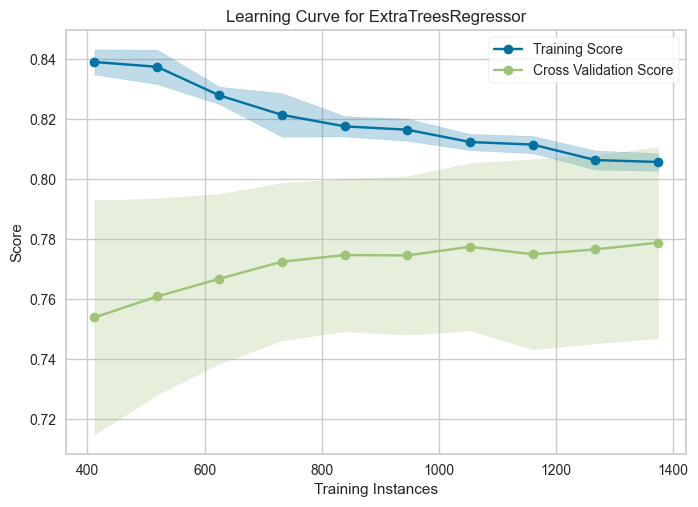

In [32]:
plot_model(finalmodel, plot='learning')

The Learning Curve for the ExtraTreesRegressor model shows that this model experiences overfitting on small amounts of training data and its performance improves on validation data as the amount of training data increases. A stable distance between training and cross-validation scores indicates the model has low variance and generalizes well. There was no significant change in validation scores with additional data, indicating that the model is good enough and may not need more data to improve performance.

### **Residual Plot**
Residual plots are an important visualization tool in statistical analysis and machine learning, used to evaluate how well a model predicts data. Residuals in this context are the difference between the observed value (original data) and the value predicted by the model. This plot provides an intuitive picture of the variation not explained by the model.

Following are some important aspects of residual plots:

- **Horizontal Axis (X-axis)**: Usually shows the values predicted by the model or sometimes the independent variable (predictor).

- **Vertical Axis (Y-axis)**: Displays the residual, namely the difference between the observed value and the value predicted by the model.

- **Residual Distribution**: Residuals should be ideally randomly distributed and show no particular pattern. If the residuals show a pattern (for example, structured or increasing with predicted values), this indicates that the model is not capturing some important aspect of the data.

- **Homoscedasticity**: Ideally, residuals should show constant variability over the entire range of predicted values (homoscedasticity). If residual variability changes (for example, increases or decreases with predicted values), this is known as heteroscedasticity and indicates that the model may be inconsistent in its predictions across data values.

- **Outlier**: Residual plots are also useful for identifying outliers, namely data points that have very large residuals. These outliers may indicate a problem in the data or that the model is inadequate to handle that type of data.

By analyzing residual plots, we can gain a better understanding of deficiencies in the model, such as the need for data transformation, adding variables, or implementing a more complex model. It is a key diagnostic tool that helps in improving model accuracy.

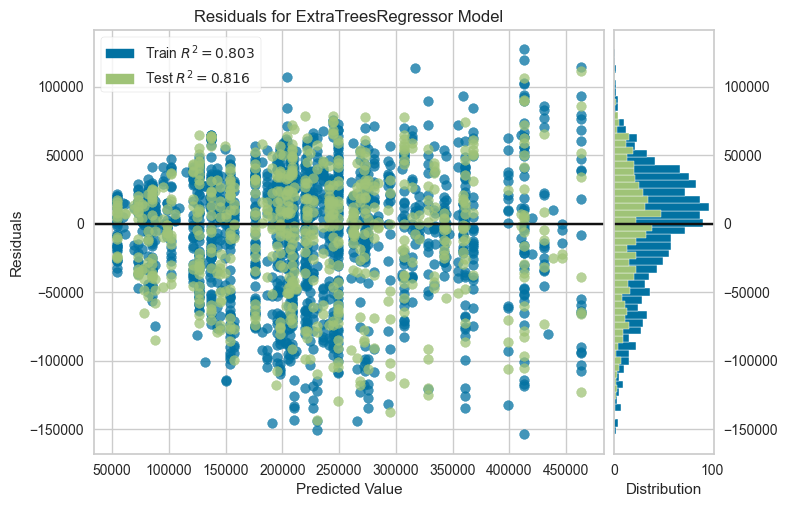

In [33]:
# Plot residual plot to assess the performance of the regression model
plot_model(finalmodel, plot='residuals')

The residual plot for the ExtraTreesRegressor model shows the difference between the values predicted by the model and the actual values (residuals) for the training and test data sets. The following is an interpretation of the graph:

- **Residual Distribution**: The residuals appear to be randomly distributed around the zero line, for both training and test data, indicating that the model has no systematic bias in predictions.

- **Coefficient of Determination (R^2)**: The R^2 value for the training set is 0.803 and for the testing set is 0.816. This fairly high value indicates that the model has a good capacity in explaining data variability.

- **Outliers**: There are several points that are far from the zero line, indicating that there are outliers in the prediction or large errors. This may require further investigation to understand the cause of the error.

- **Distribution on the Right Side**: The histogram on the right side shows the residual frequency distribution. Both distributions for training and testing appear similar, with most residuals clustered near zero indicating good predictions.

Overall, the residual graph shows that this regression model performs well, with a high degree of goodness-of-fit and without obvious bias. However, the presence of some significant outliers suggests there are certain cases where the model may not perform as intended.

### **Feature Importance**
Feature importance in the context of machine learning is a technique used to determine how important each feature (independent variable) is in predicting the target variable in a machine learning model. This technique helps in understanding the data used in the model, and can be used to improve the model by removing less important or irrelevant features.

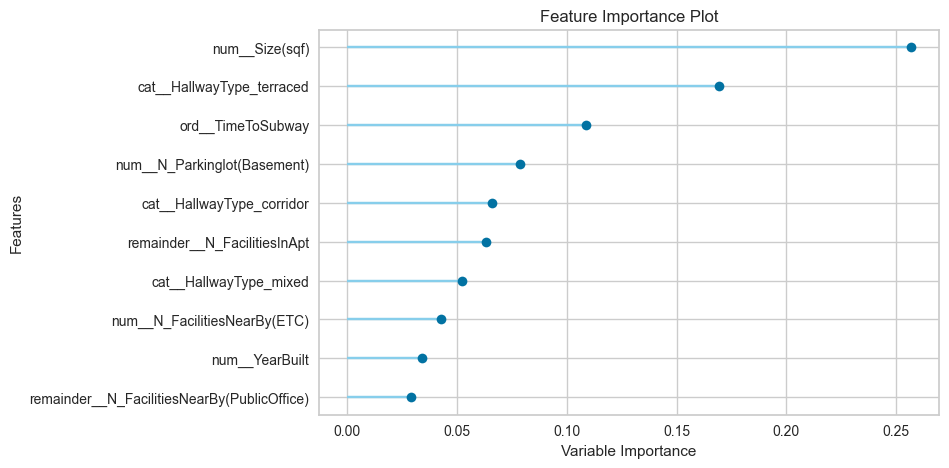

In [34]:
plot_model(finalmodel, plot='feature')

This feature importance graph (Feature Importance Plot) shows the relative contribution of each feature to the ExtraTreesRegressor predictive model. The following is an interpretation of the graph:

- **Property Size (`num_Size(sqf)`)**: This feature has the largest significant contribution to the model, indicating that property size is a key determinant of price.

- **Hallway Type (`cat_HallwayType_terrace`, `cat_HallwayType_corridor`, `cat_HallwayType_mixed`)**: Hallway type, whether terrace, corridor, or mixed, made a significant contribution to the model, indicating that this type of interior design is important in determining pricing.

- **Time to Subway (`ord_TimeToSubway`)**: The time it takes to walk to a subway station is also considered quite important, reflecting the value of accessible transportation in property valuation.

- **Basement Parking (`num_N_Parkinglot(Basement)`)**: The number of parking spaces in the basement has a smaller influence than other features but still contributes to the model.

- **Facilities in the Apartment (`remainder_N_FacilitiesInApt`)**: The number of facilities available in the apartment also affects the price.

- **Nearest Facilities (`num_N_FacilitiesNearBy(ETC)`, `remainder_N_FacilitiesNearBy(PublicOffice)`)**: The presence of nearby public facilities and other facilities has a smaller contribution to the model, but is still relevant.

- **Year Built (`num_YearBuilt`)**: Building age has the smallest contribution in the model, indicating that other factors are more dominant in determining price.

From this graph, we can conclude that features related to property size and location (such as alley type and access to the subway) are the most important in predicting property prices. This provides stakeholders in the real estate market with insight into what factors have the greatest influence on property values.

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,35300.2174,2034227621.3456,45102.4126,0.8156,0.2217,0.1766


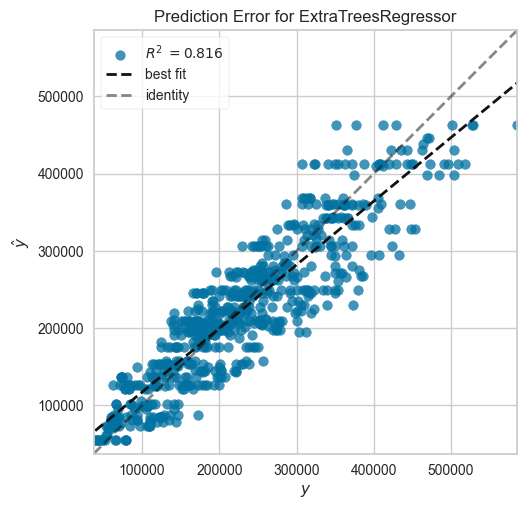

Maximum Value Error Difference From Actual Price = 143203.8
Least Positive Difference:  82.55999999999767
Smallest Negative Difference:  -44.289999999979045
Minimum Value Error Difference From Actual Price = -111641.21999999997
Number of Overfitting Data = 327
Number of Underfitting Data = 328
The amount of predicted data is the same as the actual data = 0


In [36]:
predictions = predict_model(finalmodel, verbose=True)
plot_model(finalmodel, plot='error')

different = predictions['SalePrice'] - predictions['prediction_label']
null_differences = different[different == 0]
positive_differences = different[different > 0]
negative_differences = different[different < 0]
print(f"Maximum Value Error Difference From Actual Price = {different.max()}")
print("Least Positive Difference: ", positive_differences.min())
print("Smallest Negative Difference: ", negative_differences.max())
print(f"Minimum Value Error Difference From Actual Price = {different.min()}")
print(f"Number of Overfitting Data = {positive_differences.count()}")
print(f"Number of Underfitting Data = {negative_differences.count()}")
print(f"The amount of predicted data is the same as the actual data = {null_differences.count()}")

From this graph, we can make several observations:

- **Identity line (dashed line)**: This is the line where the perfect predicted value will lie. If the model predictions exactly match the actual values, then the data points will lie on this line.
  
- **Best fit line (thick line)**: This is the line that shows the trend of the model predictions based on the data. The closer the data points are to this line, the more accurate the model predictions.
  
- **Coefficient of determination (R² = 0.816)**: A high R² value indicates that the model is quite good at predicting the target variable. An R² value of 0.816 means that around 81.6% of the variation in the target variable can be explained by the model.

- **Data points (blue)**: Shows individual predictions from the model. The scatter shows the variation of the predictions compared to the actual values.

- **Maximum value error difference from actual price**: This is the maximum difference by which the model overpredicts the price.
  
- **Smallest positive difference**: This is the smallest difference by which the model overpredicts the price.

- **Smallest negative difference**: This is the smallest difference by which the model underpredicts the price.

- **Minimum error difference from actual price**: This is the maximum difference by which the model underpredicts the price.

- **Amount of Overfitting Data and Underfitting Data**: Shows how much data the prediction is very accurate (overfitting) and where the prediction is less accurate (underfitting).

From this graph it can be concluded that the model has good predictive ability, with most predictions relatively close to the actual value, although there are several outliers where the model is quite far from the actual price. Additionally, the model shows consistent performance on both training and testing data, as indicated by similar R² values between the two data sets. This indicates that the model does not experience significant overfitting.

### **Time Complexity**
The time required to train a regression model is an important factor in the machine learning model development process. In the image above, we see the output of a Python script that measures training time for a `Extra Trees Regressor (ET)` model.

In [37]:
import time

# Calculates the time required to train the model
start_time = time.time()
et = create_model(finalmodel)
end_time = time.time()
time_taken = end_time - start_time
print(f"Time required to train the ET model: {time_taken} detik")


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,37239.9643,2103414813.7937,45863.0005,0.8151,0.2372,0.2016
1,38903.8166,2337949647.9836,48352.3489,0.7739,0.2378,0.1988
2,37603.0488,2245212159.3551,47383.6698,0.8063,0.2396,0.1968
3,38771.8778,2583480258.0917,50827.9476,0.7721,0.2340,0.1852
4,38093.5161,2264465644.4293,47586.4019,0.7865,0.2248,0.1815
5,39003.0879,2478291480.6906,49782.4415,0.7270,0.2560,0.1938
6,34221.8048,1994108478.2511,44655.4418,0.8283,0.2323,0.1887
7,40345.0156,2515147014.8845,50151.2414,0.7319,0.2455,0.2046
8,37545.4089,2527862141.4662,50277.8494,0.7665,0.2483,0.1881


Time required to train the ET model: 4.941841125488281 detik


## **Model Explanation**
- **How Final Model Works**:
Extra Trees Regressor is a method in machine learning for solving regression problems. The way it works is based on ensemble learning principles, specifically using the "ensemble of decision trees" method. The following is an explanation of the working steps:

1. **Decision Tree Formation:** Extra Trees Regressor produces many decision trees. Each tree is formed from a random sample of data. In contrast to Random Forest which uses bootstrap sampling (sample with replacement), Extra Trees uses the entire dataset to train each tree.

2. **Feature Selection and Split:**
    - When building each node in the tree, instead of looking for the best split of all features, the Extra Trees algorithm randomly selects a subset of features and creates the best split from this subset.
    - This is different from the usual decision tree algorithm which searches for the best split of all available features.

3. **Variance Reduction and Overfitting:** Because it uses multiple trees and a random feature selection method, Extra Trees tends to reduce variance and overfitting compared to using just one decision tree.

4. **Selection of Prediction Values:** To make predictions, the Extra Trees Regressor takes the average of the predictions produced by all trees. This provides more stable and accurate results.

5. **Parameter Tuning:** Like other machine learning algorithms, Extra Trees Regressor also has several parameters that need to be tuned, such as the number of trees, maximum depth of trees, number of features used for each split, etc.

Extra Trees Regressor is very effective in handling data with large and complex dimensions. It also tends to be faster in the training process compared to the Random Forest method because it does not use bootstrap sampling and because the split selection method is simpler.

- **Limitations of the Final Model**:
     From the residual plot, it appears that there is variation in the residuals which increases as the predicted value increases. This suggests that the model may have less consistent performance at higher target values. Additionally, there are indications of mild overfitting, as shown by the gap between the training scores and the cross-validation scores on the learning curve.

- **Conditions of Model Performance Data That Can and Cannot Be Trusted**:
     - Conditions for Trustworthy Model Performance Data:
        The `ExtraTreesRegressor` model has reliable performance when:
        - Numerical features such as property size (`Size(sqf)`) and year built (`YearBuilt`) have similar distributions to the training data, including the range of values and the presence of outliers.
        - Categorical features, such as hallway type (`HallwayType`), appear with similar frequency in the training data, so the model has learned a good representation of each category.
        - Ordinal features, especially time to subway station (`TimeToSubway`), reflect the same conditions as those in the training set, with mappings already recognized by the model.
        - Additional features developed during pre-processing, if any, must have a consistent pattern with the training set.

- **Unreliable Condition of Model Performance Data**:
        This model may be less accurate or the results unreliable when:
        - Numerical features have extreme values that never or rarely appear in the training set, which can cause the model to fail to predict correctly due to a lack of historical reference.
        - New categorical features or categories that rarely appear in training can lead to incorrect predictions because the model is not 'used' to those categories.
        - For ordinal features, if the distribution of the new data is very different from the training data, such as the distance to a subway station that was not previously considered, the model may not predict accurately.
        - Significant variables in the model, if they have unexpected behavior or are inconsistent with the training data, can cause a decrease in model accuracy.

     Overall, this model will perform well on data that has similar characteristics to the training data, especially in terms of distribution and range of feature values. Conversely, the model may struggle to accurately predict data that is very different from what the model 'knows', whether due to extreme values, new categories, or different distribution patterns.

- **Final Model Interpretation**:
     1. **RobustScaler**: This model uses `RobustScaler` for numerical features, which reduces the influence of outliers in the data. This scale uses the median and interquartile range so it is less influenced by outliers compared to using the mean and standard deviation.

     2. **OneHotEncoder**:

  Categorical features are converted to one-hot encoding, which means each category in the feature will be represented by a binary column indicating the presence or absence of that category in the sample.

     3. **OrdinalEncoder**: Ordinal features, such as 'TimeToSubway', which have an order or ranking, are encoded with ordinal values according to the given mapping. For example, the time to a subway station is coded on a scale of 1-5, where perhaps 'no_bus_stop_nearby' = 1 and so on according to the distance.

     4. **ExtraTreesRegressor**: This model is an ensemble of decision trees built successively. Each tree tries to correct the mistakes of the previous tree. This model is known to be strong against overfitting and able to handle non-linear data. Parameters such as `n_estimators` determine how many trees influence the overall model, while `max_depth` determines the maximum depth of each tree.

     5. **Feature Importance**: In the context of Extra Trees, features with high importance are considered as key contributors in making predictions. Features with low values may not have much influence on model predictions.

     6. **Model Evaluation**: Metrics such as RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), and MAPE (Mean Absolute Percentage Error) are used to evaluate the model. These values give an idea of how well the model predicts never-before-seen data and are usually used to compare models or for cross-validation.

This information provides an overview of the performance, reliability, and interpretability of this regression model. For more in-depth analysis, further testing using additional and diverse data sets will be performed after this.

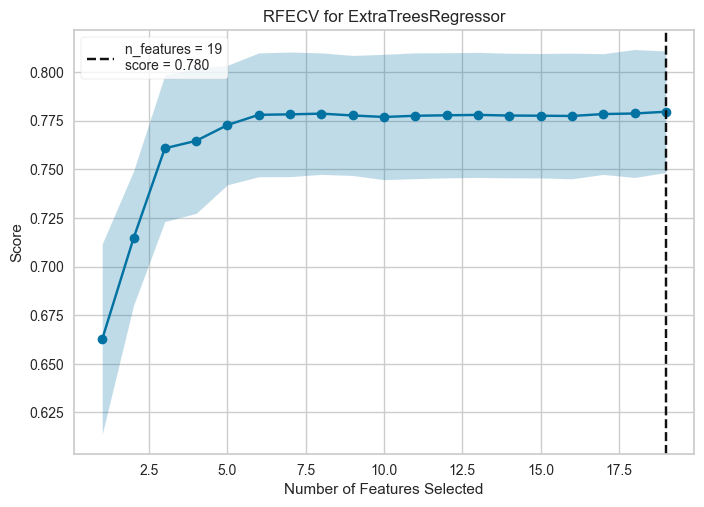

In [49]:
plot_model(finalmodel, plot='rfe')

This graph shows the results of Recursive Feature Elimination with Cross-Validation (RFECV) performed on the ExtraTreesRegressor model. RFECV is a technique for selecting features by recursively removing the weakest features and recalculating the model to determine the combination of features that provides the best performance.

The following is an interpretation of the graph:

- The graph shows the model's cross-validation score (usually R2 score or accuracy) plotted against the number of features selected.
- It can be seen that a significant increase in model performance occurs when the number of features used increases from 1 to around 5 features.
- After about 5 features, the score increase becomes slower and starts to plateau, indicating that adding additional features no longer provides a significant performance increase to the model.
- The vertical dashed line shows the optimal number of features selected by RFECV, which in this case is 19 features with a score of about 0.780.
- The shaded area shows the confidence interval for the cross-validation score at each point, giving an idea of how stable the model performs with a given number of features.

From this graph, we can conclude that the ExtraTreesRegressor model achieves relatively stable and optimal performance using 19 features. This shows that using all available features provides the best results for this model in the context of the dataset used.

## **Validation**

In [38]:
# train data prediction
seen = predict_model(finalmodel)
seen.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,35300.2174,2034227621.3456,45102.4126,0.8156,0.2217,0.1766


,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice,prediction_label
498,terraced,0-5min,Myung-duk,2.0,3.0,1.0,181.0,2006,4,903,216814,206902.10
361,mixed,5-10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,232743,208742.84
3653,corridor,5-10min,Sin-nam,1.0,5.0,2.0,18.0,1986,3,508,59911,72902.19
2420,terraced,0-5min,Banwoldang,0.0,4.0,1.0,605.0,2007,5,1273,371681,333223.98
3794,terraced,10-15min,Kyungbuk-uni-hospital,1.0,5.0,1.0,0.0,1986,4,914,168141,157439.44


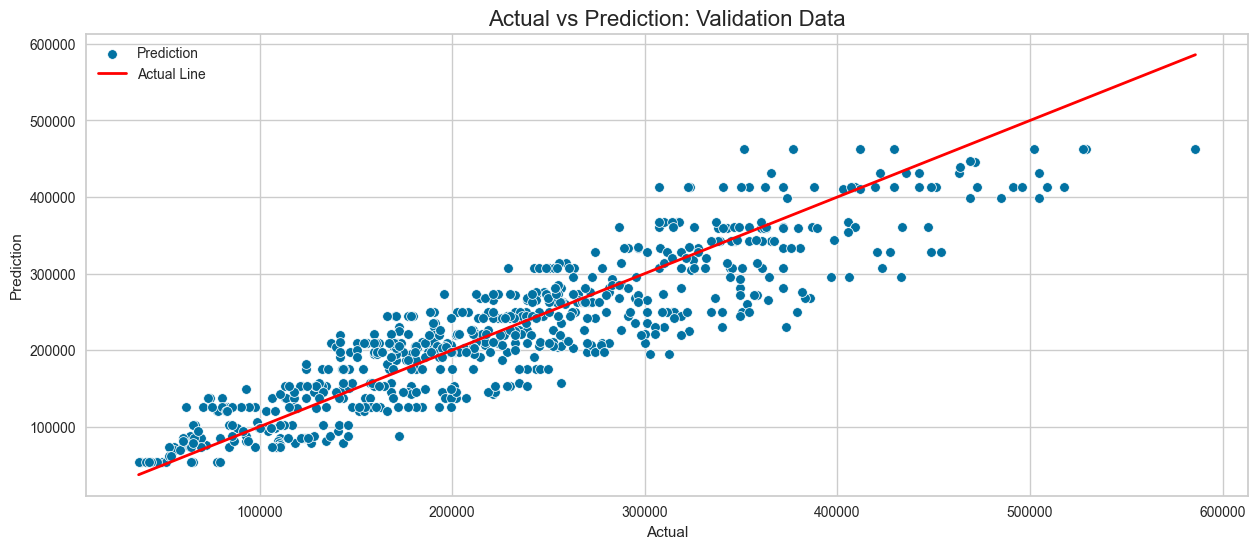

In [39]:
# Create a comparison scatterplot between predictions and actuals
plt.figure(figsize=(15,6))

sns.scatterplot(data=seen, y='prediction_label', x='SalePrice', label='Prediction')
sns.regplot(data=seen, x='SalePrice', y='SalePrice', scatter=False, line_kws = {'linewidth': 2}, color='red', label='Actual Line')

plt.title('Actual vs Prediction: Validation Data', fontsize=16)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.legend()
plt.show()

From the plot above, the insights we can get are:

- **Correlation**: There is a strong positive correlation between the actual values and the predicted values, shown by the dots that mostly follow the red line. This shows that the model has good predictive ability.

- **Prediction Accuracy**: The red line represents the actual value. We can see that many predictions almost coincide with this line, especially in the lower price range, which shows the high accuracy of the model in predicting prices.

- **Prediction Spread**: As the actual value increases, the prediction spread becomes wider. This may indicate that the model is more accurate in predicting lower property prices than higher property prices.

- **Outliers**: There are several points that are far from the red line, especially in areas with high predicted values. This can signal outliers or cases where the model did not perform well in its predictions.

- **Model Improvement**: Although the model appears generally predictive, there may be room for improvement, particularly in handling high values that appear to cause greater variability in predictions.

- **Assessment Aspects**: This graph can be used to assess whether there is a need for further tuning of the model, such as adjusting the model complexity or adding new features that might improve accuracy at a higher range of values.

In [40]:
predictions2 = predict_model(finalmodel, verbose=True)

diff2 = predictions2['SalePrice'] - predictions2['prediction_label']
nulldiff2 = diff2[diff2 == 0]
posdiff2 = diff2[diff2 > 0]
negdiff2 = diff2[diff2 < 0]
print(f"Actual Maximum Value Error Price Difference From Validation = {diff2.max()}")
print("Least Positive Difference: ", posdiff2.min())
print("Smallest Negative Difference: ", negdiff2.max())
print(f"Minimum Value Error Difference From Actual Price = {diff2.min()}")
print(f"Number of Overfitting Data = {posdiff2.count()}")
print(f"Number of Underfitting Data = {negdiff2.count()}")
print(f"The amount of predicted data is the same as the actual data = {nulldiff2.count()}")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,35300.2174,2034227621.3456,45102.4126,0.8156,0.2217,0.1766


Actual Maximum Value Error Price Difference From Validation = 143203.8
Least Positive Difference:  82.55999999999767
Smallest Negative Difference:  -44.289999999979045
Minimum Value Error Difference From Actual Price = -111641.21999999997
Number of Overfitting Data = 327
Number of Underfitting Data = 328
The amount of predicted data is the same as the actual data = 0


## **Test Model to Unseen Data**

In [41]:
# Test the model using unseen data
unseen = predict_model(finalmodel, data=dataunseen)
unseen.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,34679.2938,1975648397.4619,44448.2665,0.8168,0.2407,0.1981


,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice,prediction_label
1618,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,255442,297956.60
893,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,184955,165422.66
309,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,676,70796,75917.03
1877,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1643,515929,384679.22
1189,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,1131,150442,197220.78


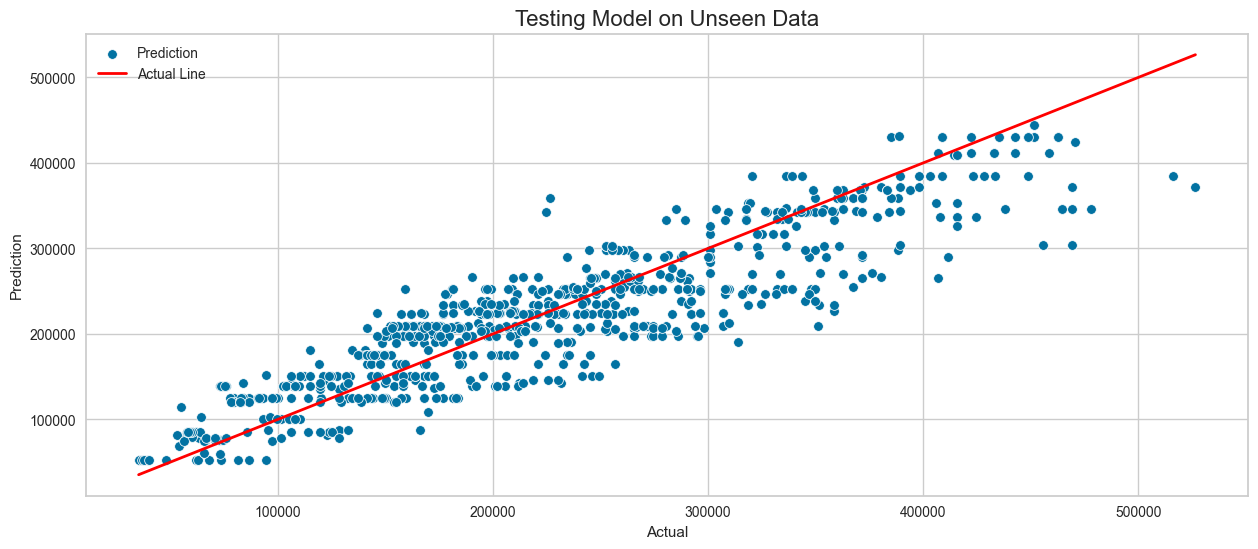

In [42]:
# Create a comparison scatterplot using unseen data
plt.figure(figsize=(15,6))

sns.scatterplot(data=unseen, y='prediction_label', x='SalePrice', label='Prediction')
sns.regplot(data=unseen, x='SalePrice', y='SalePrice', scatter=False, line_kws = {'linewidth': 2}, color='red', label='Actual Line')

plt.title('Testing Model on Unseen Data', fontsize=16)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.legend()
plt.show()

This “Model Testing on Unseen Data” graph is a visual representation of your predictive model performance. The blue dots represent the predicted results of model compared to the actual values. The red line is the regression line, which shows the ideal relationship between predicted and actual values.

From this graph, we can observe several things:

- Distribution of points: Points that are close to the red line indicate accurate predictions, while points that are far from the red line indicate less accurate predictions. This distribution can give you an idea of the variability of your model's prediction results.

- Slope of the red line: The slope of the red line shows the degree of correlation between predicted and actual values. If the red line has a positive slope, this indicates that your model is likely to make accurate predictions.

- Concentration of dots: The concentration of dots around the red line shows the extent to which your model predictions correlate with the actual values. If the dots are concentrated around the red line, this indicates that your model has a good level of accuracy.

In [43]:
predictions3 = predict_model(finalmodel, data=dataunseen, verbose=True)

diff3 = predictions3['SalePrice'] - predictions3['prediction_label']
nulldiff3 = diff3[diff3 == 0]
posdiff3 = diff3[diff3 > 0]
negdiff3 = diff3[diff3 < 0]
print(f"Actual Maximum Value Error Price Difference From Data Unseen = {diff3.max()}")
print("Least Positive Difference: ", posdiff3.min())
print("Smallest Negative Difference: ", negdiff3.max())
print(f"Minimum Value Error Difference From Actual Price = {diff3.min()}")
print(f"Number of Overfitting Data = {posdiff3.count()}")
print(f"Number of Underfitting Data = {negdiff3.count()}")
print(f"The amount of predicted data is the same as the actual data = {nulldiff3.count()}")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,34679.2938,1975648397.4619,44448.2665,0.8168,0.2407,0.1981


Actual Maximum Value Error Price Difference From Data Unseen = 164542.46000000002
Least Positive Difference:  124.22000000000116
Smallest Negative Difference:  -353.71000000002095
Minimum Value Error Difference From Actual Price = -132159.21999999997
Number of Overfitting Data = 388
Number of Underfitting Data = 437
The amount of predicted data is the same as the actual data = 0


## **Advanced Analysis**

Based on the data analysis and predictive models we have carried out, here are specific points that can serve as a guide for real estate agents in Daegu:

### **Benefits of Using Predictive Models**
- **Time Efficiency**: The model allows agents to estimate prices quickly and efficiently, reducing the time required for in-depth market analysis.
- **Price Accuracy**: The model provides data-driven price estimates, increasing the likelihood of market-appropriate pricing, which can accelerate sales.
- **Customer Trust**: Price consultations supported by detailed data analysis increase customer confidence in agent recommendations.
- **Data-Driven Decisions**: Models provide a solid basis for decision-making, reducing reliance on intuition and increasing objectivity.

### **Model Disadvantages and Limitations**
- **Prediction Uncertainty**: Although the model has been tested with historical data, there is a degree of uncertainty, especially for properties with unusual characteristics.
- **Market Changes**: Models must be updated regularly to maintain accuracy in the face of dynamic real estate market fluctuations.
- **Maintenance Costs**: There are operational costs for maintaining the model, including algorithm updates and training data refreshes.

### **Recommendations for Decision Making**
- **Evaluate Specific Features**: Agents should evaluate features that have a significant impact on price, such as the size and year of construction of the property, in marketing and negotiations.
- **Validation for Atypical Properties**: For unique or atypical properties, agents must perform additional validation of the price estimates generated by the model.
- **Model Performance Monitoring**: Agencies need to regularly monitor model performance against current market data to assess when the model needs to be tuned or updated.
- **Training and Development**: Agents need to receive training to interpret model output and use it in their sales strategy.

### **Property Investment and Development Strategy**
- **Insight for Investors**: The model provides insight into the most valuable features in the market, which investors can use to focus investment on properties that have high resale value potential.
- **Data-Driven Development**: Property builders and developers can use model data to determine which features should be prioritized in development projects, based on current market preferences.

Overall, this model can be an invaluable tool in the arsenal of real estate agents in Daegu to optimize pricing strategies and increase competitiveness in the market. However, it is important for agents to remain critical and use the model as one of many tools in decision-making, while still considering changing market factors and their professional experience.

## **Limitation**

In the context of apartment sales prices, the division of price groups is based on the assumption that the real estate market has different segments reflecting various price ranges.
- The '0 - 200000' group represents more affordable apartments, often found in areas with fewer public facilities or older buildings.
- The '200001 - 400000' group may indicate mid-range apartments, which have better access to public facilities and are in more desirable locations.
- The '400001 - 600000' group includes premium apartments located in strategic locations with complete facilities and relatively new buildings.

This breakdown allows for a more nuanced understanding of how certain features such as size, year built, and proximity to public amenities can influence price ranges in the real estate market.

In [44]:
def priceclass(x):
    if 0 <= x < 200000 :
        return '0 - 200000'
    elif 200001 <= x < 400000 :
        return '200001 - 400000'
    elif 400001 <= x <= 600000 :
        return '400001 - 600000'
    
rangeclass = [
    '0 - 200000', '200001 - 400000', '400001 - 600000'
]

In [45]:
limitation = predict_model(finalmodel)
limitation['priceclass'] = limitation['prediction_label'].apply(priceclass)
limitation.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,35300.2174,2034227621.3456,45102.4126,0.8156,0.2217,0.1766


,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice,prediction_label,priceclass
498,terraced,0-5min,Myung-duk,2.0,3.0,1.0,181.0,2006,4,903,216814,206902.10,200001 - 400000
361,mixed,5-10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,232743,208742.84,200001 - 400000
3653,corridor,5-10min,Sin-nam,1.0,5.0,2.0,18.0,1986,3,508,59911,72902.19,0 - 200000
2420,terraced,0-5min,Banwoldang,0.0,4.0,1.0,605.0,2007,5,1273,371681,333223.98,200001 - 400000
3794,terraced,10-15min,Kyungbuk-uni-hospital,1.0,5.0,1.0,0.0,1986,4,914,168141,157439.44,0 - 200000


In [46]:
from sklearn.metrics import mean_absolute_percentage_error

score = []
for i in rangeclass:
    table = limitation[limitation['priceclass'] == i]
    mape = mean_absolute_percentage_error(y_pred=table['prediction_label'], y_true=table['SalePrice'])
    score.append(mape*100)

result = pd.DataFrame({
    'Range Prediction Price': rangeclass,
    'MAPE (%)': score
})
result

,Range Prediction Price,MAPE (%)
0,0 - 200000,23.292220
1,200001 - 400000,14.175307
2,400001 - 600000,11.831039


The interpretation of the final model limitations is as follows:

1. For apartments with a predicted price range between 0 and 200,000, the model has a MAPE of 23.29%. This means that, on average, the model predictions deviate from the actual prices by about 23.29% for this price range.

2. For the predicted price range of 200,001 to 400,000, the MAPE model decreases to 14.17%. This shows that the model is more accurate in predicting apartment prices in this price range, with an average deviation of around 14.17%.

3. In the predicted price range of 400,001 to 600,000, MAPE is even lower, namely 11.83%. This indicates that the model is most accurate in predicting apartment prices for this price range compared to the previous two ranges, with an average deviation of around 11.83%.

The conclusion that can be drawn is that the model is more accurate in predicting higher apartment prices. A lower MAPE at a higher price range could indicate that the model is better at capturing the features that determine the price of more expensive apartments, or perhaps the data for higher priced apartments has less variation and is therefore easier to predict.

# **Conclusion & Recommendations**

Based on the analysis that has been carried out, we can draw several important points and provide the following recommendations:

## **Conclusion:**

1. **Daegu Real Estate Market:**
    - The Extra Trees Regressor model has demonstrated an ability to understand and predict the real estate price dynamics in Daegu, considering factors such as property size, year built, and proximity to public facilities.

2. **Sales Price Accuracy:**
    - The model shows varying degrees of prediction accuracy across different price ranges. For apartments priced between 0 to 200,000, the MAPE is at 23.29%, indicating a significant average deviation from actual prices. The accuracy improves in higher price ranges, with a MAPE of 14.17% for 200,001 to 400,000, and further to 11.83% for 400,001 to 600,000. This trend suggests a higher prediction reliability for more expensive apartments.

3. **Predictive Model Preference:**
    - The Extra Trees Regressor was selected for its consistent performance and reliability in handling various data types. The lower MAPE in higher price ranges suggests that the model is particularly adept at capturing the features that drive the prices of more expensive apartments, or that these apartments have less price variation, making them easier to predict.

## **Recommendation:**

1. **Model Updates and Adjustments:**
    - Continuously update the model with the latest transaction data to ensure high accuracy.
    - Regularly adjust the model parameters to align with the current market trends and improve prediction precision.

2. **Integration and Automation:**
    - Integrate the predictive model into real estate CRM systems to streamline the price assessment process.
    - Employ the model in automated price recommendation systems for clients, utilizing both historical data and forecasts of future trends.

3. **Model Validation and Risk Mitigation:**
    - Implement cross-validation with diverse datasets to confirm the model's robustness.
    - Establish risk mitigation strategies to address potential issues such as overfitting or inaccuracies in specific pricing segments.

4. **Data-Driven Strategy Development:**
    - Formulate marketing strategies targeting property features that significantly influence the sales price.
    - Optimize the allocation of resources based on insights from the analysis of critical features and market price predictions.

Incorporating these conclusions and recommendations, real estate stakeholders in Daegu can leverage the Extra Trees Regressor model to refine pricing and sales strategies, thereby enhancing accuracy and minimizing risks associated with price prediction errors.

# **Deployment**

In [47]:
import pickle

with open('ET.pkl', 'wb') as file:
    pickle.dump(finalmodel, file)